### Import TensorFlow

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the FASHION_MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

    32768/170498071 [..............................] - ETA: 4:40

    90112/170498071 [..............................] - ETA: 3:24

   204800/170498071 [..............................] - ETA: 2:14

   434176/170498071 [..............................] - ETA: 1:24

   884736/170498071 [..............................] - ETA: 51s 

  1777664/170498071 [..............................] - ETA: 30s

  3579904/170498071 [..............................] - ETA: 17s

  6643712/170498071 [>.............................] - ETA: 10s

  9715712/170498071 [>.............................] - ETA: 8s 

 12820480/170498071 [=>............................] - ETA: 6s

 15892480/170498071 [=>............................] - ETA: 5s

 18980864/170498071 [==>...........................] - ETA: 5s

 22102016/170498071 [==>...........................] - ETA: 4s

 25190400/170498071 [===>..........................] - ETA: 4s

 28262400/170498071 [===>..........................] - ETA: 4s

 30908416/170498071 [====>.........................] - ETA: 3s

 33415168/170498071 [====>.........................] - ETA: 3s

 35708928/170498071 [=====>........................] - ETA: 3s

 38592512/170498071 [=====>........................] - ETA: 3s

 41664512/170498071 [======>.......................] - ETA: 3s

 44769280/170498071 [======>.......................] - ETA: 3s

 47890432/170498071 [=======>......................] - ETA: 3s

 50970624/170498071 [=======>......................] - ETA: 2s

 54099968/170498071 [========>.....................] - ETA: 2s

 56582144/170498071 [========>.....................] - ETA: 2s

 59351040/170498071 [=========>....................] - ETA: 2s

 62423040/170498071 [=========>....................] - ETA: 2s

 64397312/170498071 [==========>...................] - ETA: 2s

 67223552/170498071 [==========>...................] - ETA: 2s

 70320128/170498071 [===========>..................] - ETA: 2s

 73424896/170498071 [===========>..................] - ETA: 2s

 75964416/170498071 [============>.................] - ETA: 2s

 78249984/170498071 [============>.................] - ETA: 2s

 81059840/170498071 [=============>................] - ETA: 1s

 83165184/170498071 [=============>................] - ETA: 1s

 85966848/170498071 [==============>...............] - ETA: 1s

 89030656/170498071 [==============>...............] - ETA: 1s

 92110848/170498071 [===============>..............] - ETA: 1s

 94371840/170498071 [===============>..............] - ETA: 1s

 96976896/170498071 [================>.............] - ETA: 1s

100081664/170498071 [================>.............] - ETA: 1s

103030784/170498071 [=================>............] - ETA: 1s

105291776/170498071 [=================>............] - ETA: 1s

107986944/170498071 [==================>...........] - ETA: 1s

111108096/170498071 [==================>...........] - ETA: 1s

114106368/170498071 [===================>..........] - ETA: 1s

116654080/170498071 [===================>..........] - ETA: 1s

118939648/170498071 [===================>..........] - ETA: 1s

121905152/170498071 [====================>.........] - ETA: 1s

124239872/170498071 [====================>.........] - ETA: 0s

126910464/170498071 [=====================>........] - ETA: 0s

129687552/170498071 [=====================>........] - ETA: 0s

132775936/170498071 [======================>.......] - ETA: 0s

135888896/170498071 [======================>.......] - ETA: 0s

138936320/170498071 [=======================>......] - ETA: 0s

141328384/170498071 [=======================>......] - ETA: 0s

143851520/170498071 [========================>.....] - ETA: 0s

146956288/170498071 [========================>.....] - ETA: 0s

150036480/170498071 [=========================>....] - ETA: 0s

152526848/170498071 [=========================>....] - ETA: 0s

154918912/170498071 [==========================>...] - ETA: 0s

157958144/170498071 [==========================>...] - ETA: 0s

161062912/170498071 [===========================>..] - ETA: 0s

163643392/170498071 [===========================>..] - ETA: 0s

166461440/170498071 [============================>.] - ETA: 0s

166739968/170498071 [============================>.] - ETA: 0s

169877504/170498071 [============================>.] - ETA: 0s

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
train_images = train_images.reshape(60000,28,28,1)
train_images.shape

(60000, 28, 28, 1)

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


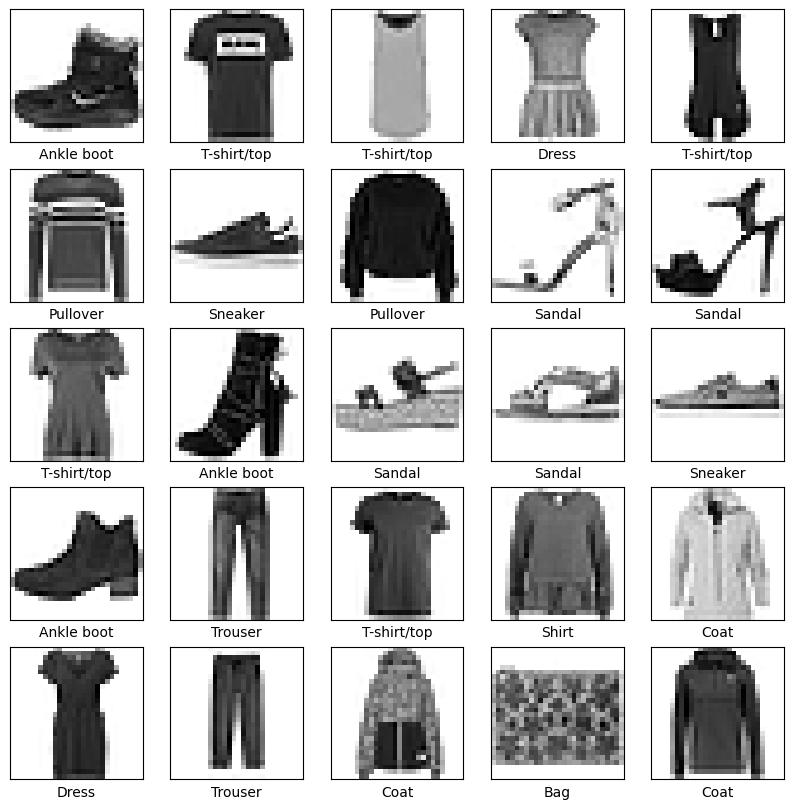

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Create the convolutional base

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))

Let's display the architecture of your model so far:

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 56)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 56)          28280     
                                                                 
Total params: 42728 (166.91 KB)
Trainable params: 42728 

 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         


 g2D)                                                            


 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     


Total params: 56320 (220.00 KB)


Trainable params: 56320 (220.00 KB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


### Add Dense layers on top

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of the model:

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 56)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 56)          28280     
                                                                 
 flatten (Flatten)           (None, 504)               0

 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         


 g2D)                                                            


 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     


 flatten (Flatten)           (None, 1024)              0         


 dense (Dense)               (None, 64)                65600     


 dense_1 (Dense)             (None, 10)                650       


Total params: 122570 (478.79 KB)


Trainable params: 122570 (478.79 KB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


### Compile and train the model

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.4851 - accuracy: 0.8220 - val_loss: 0.3547 - val_accuracy: 0.8688
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3171 - accuracy: 0.8843 - val_loss: 0.3073 - val_accuracy: 0.8905
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2716 - accuracy: 0.9002 - val_loss: 0.2950 - val_accuracy: 0.8926
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2391 - accuracy: 0.9121 - val_loss: 0.2767 - val_accuracy: 0.9003
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2154 - accuracy: 0.9204 - val_loss: 0.2783 - val_accuracy: 0.9008
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1949 - accuracy: 0.9273 - val_loss: 0.2837 - val_accuracy: 0.9016
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1789 - accuracy: 0.9341 - val_loss: 0.2600 -

 125/1563 [=>............................] - ETA: 4s - loss: 2.1503 - accuracy: 0.1992

 140/1563 [=>............................] - ETA: 4s - loss: 2.1350 - accuracy: 0.2060

 155/1563 [=>............................] - ETA: 4s - loss: 2.1152 - accuracy: 0.2149

 171/1563 [==>...........................] - ETA: 4s - loss: 2.0937 - accuracy: 0.2224

 186/1563 [==>...........................] - ETA: 4s - loss: 2.0714 - accuracy: 0.2327

 201/1563 [==>...........................] - ETA: 4s - loss: 2.0613 - accuracy: 0.2382

 216/1563 [===>..........................] - ETA: 4s - loss: 2.0511 - accuracy: 0.2415

 231/1563 [===>..........................] - ETA: 4s - loss: 2.0405 - accuracy: 0.2455

 246/1563 [===>..........................] - ETA: 4s - loss: 2.0259 - accuracy: 0.2509

 261/1563 [====>.........................] - ETA: 4s - loss: 2.0163 - accuracy: 0.2554

 276/1563 [====>.........................] - ETA: 4s - loss: 2.0062 - accuracy: 0.2594

 291/1563 [====>.........................] - ETA: 4s - loss: 1.9910 - accuracy: 0.2649

 306/1563 [====>.........................] - ETA: 4s - loss: 1.9789 - accuracy: 0.2698

 321/1563 [=====>........................] - ETA: 4s - loss: 1.9702 - accuracy: 0.2727

 336/1563 [=====>........................] - ETA: 4s - loss: 1.9590 - accuracy: 0.2762

 351/1563 [=====>........................] - ETA: 4s - loss: 1.9466 - accuracy: 0.2803

 366/1563 [======>.......................] - ETA: 4s - loss: 1.9353 - accuracy: 0.2842

 381/1563 [======>.......................] - ETA: 4s - loss: 1.9258 - accuracy: 0.2875

 397/1563 [======>.......................] - ETA: 3s - loss: 1.9158 - accuracy: 0.2923

 412/1563 [======>.......................] - ETA: 3s - loss: 1.9048 - accuracy: 0.2963

 427/1563 [=======>......................] - ETA: 3s - loss: 1.8956 - accuracy: 0.2991

 442/1563 [=======>......................] - ETA: 3s - loss: 1.8904 - accuracy: 0.3011

 457/1563 [=======>......................] - ETA: 3s - loss: 1.8861 - accuracy: 0.3026

 472/1563 [========>.....................] - ETA: 3s - loss: 1.8773 - accuracy: 0.3061

 487/1563 [========>.....................] - ETA: 3s - loss: 1.8705 - accuracy: 0.3089

 502/1563 [========>.....................] - ETA: 3s - loss: 1.8636 - accuracy: 0.3111

 518/1563 [========>.....................] - ETA: 3s - loss: 1.8565 - accuracy: 0.3136

 533/1563 [=========>....................] - ETA: 3s - loss: 1.8492 - accuracy: 0.3164

 548/1563 [=========>....................] - ETA: 3s - loss: 1.8420 - accuracy: 0.3185

 563/1563 [=========>....................] - ETA: 3s - loss: 1.8331 - accuracy: 0.3216

 578/1563 [==========>...................] - ETA: 3s - loss: 1.8263 - accuracy: 0.3246

 593/1563 [==========>...................] - ETA: 3s - loss: 1.8209 - accuracy: 0.3266

 608/1563 [==========>...................] - ETA: 3s - loss: 1.8138 - accuracy: 0.3299

 623/1563 [==========>...................] - ETA: 3s - loss: 1.8077 - accuracy: 0.3321

 638/1563 [===========>..................] - ETA: 3s - loss: 1.8014 - accuracy: 0.3344

 653/1563 [===========>..................] - ETA: 3s - loss: 1.7955 - accuracy: 0.3367

 668/1563 [===========>..................] - ETA: 3s - loss: 1.7903 - accuracy: 0.3391

 683/1563 [============>.................] - ETA: 2s - loss: 1.7871 - accuracy: 0.3407

 698/1563 [============>.................] - ETA: 2s - loss: 1.7806 - accuracy: 0.3433

 713/1563 [============>.................] - ETA: 2s - loss: 1.7755 - accuracy: 0.3455

 728/1563 [============>.................] - ETA: 2s - loss: 1.7726 - accuracy: 0.3468

 743/1563 [=============>................] - ETA: 2s - loss: 1.7670 - accuracy: 0.3491

 758/1563 [=============>................] - ETA: 2s - loss: 1.7609 - accuracy: 0.3520

 773/1563 [=============>................] - ETA: 2s - loss: 1.7570 - accuracy: 0.3537

 788/1563 [==============>...............] - ETA: 2s - loss: 1.7520 - accuracy: 0.3552

 803/1563 [==============>...............] - ETA: 2s - loss: 1.7464 - accuracy: 0.3577

 818/1563 [==============>...............] - ETA: 2s - loss: 1.7415 - accuracy: 0.3606

 833/1563 [==============>...............] - ETA: 2s - loss: 1.7356 - accuracy: 0.3627

 848/1563 [===============>..............] - ETA: 2s - loss: 1.7306 - accuracy: 0.3643

 863/1563 [===============>..............] - ETA: 2s - loss: 1.7257 - accuracy: 0.3661

 878/1563 [===============>..............] - ETA: 2s - loss: 1.7212 - accuracy: 0.3676

 894/1563 [================>.............] - ETA: 2s - loss: 1.7184 - accuracy: 0.3685

 909/1563 [================>.............] - ETA: 2s - loss: 1.7125 - accuracy: 0.3705

 924/1563 [================>.............] - ETA: 2s - loss: 1.7089 - accuracy: 0.3717

 939/1563 [=================>............] - ETA: 2s - loss: 1.7053 - accuracy: 0.3729

 954/1563 [=================>............] - ETA: 2s - loss: 1.7020 - accuracy: 0.3739

 969/1563 [=================>............] - ETA: 2s - loss: 1.6975 - accuracy: 0.3754

 984/1563 [=================>............] - ETA: 1s - loss: 1.6941 - accuracy: 0.3766

 999/1563 [==================>...........] - ETA: 1s - loss: 1.6906 - accuracy: 0.3782

1014/1563 [==================>...........] - ETA: 1s - loss: 1.6870 - accuracy: 0.3797

1029/1563 [==================>...........] - ETA: 1s - loss: 1.6824 - accuracy: 0.3812

1044/1563 [===================>..........] - ETA: 1s - loss: 1.6796 - accuracy: 0.3820

1059/1563 [===================>..........] - ETA: 1s - loss: 1.6761 - accuracy: 0.3837

1074/1563 [===================>..........] - ETA: 1s - loss: 1.6723 - accuracy: 0.3853

1089/1563 [===================>..........] - ETA: 1s - loss: 1.6689 - accuracy: 0.3866

1104/1563 [====================>.........] - ETA: 1s - loss: 1.6649 - accuracy: 0.3883

1120/1563 [====================>.........] - ETA: 1s - loss: 1.6611 - accuracy: 0.3896

1135/1563 [====================>.........] - ETA: 1s - loss: 1.6578 - accuracy: 0.3911

1150/1563 [=====================>........] - ETA: 1s - loss: 1.6540 - accuracy: 0.3928

1165/1563 [=====================>........] - ETA: 1s - loss: 1.6507 - accuracy: 0.3943

1180/1563 [=====================>........] - ETA: 1s - loss: 1.6461 - accuracy: 0.3966

1195/1563 [=====================>........] - ETA: 1s - loss: 1.6428 - accuracy: 0.3980

1210/1563 [======================>.......] - ETA: 1s - loss: 1.6405 - accuracy: 0.3990

1225/1563 [======================>.......] - ETA: 1s - loss: 1.6373 - accuracy: 0.4004

1240/1563 [======================>.......] - ETA: 1s - loss: 1.6347 - accuracy: 0.4016

1256/1563 [=======================>......] - ETA: 1s - loss: 1.6321 - accuracy: 0.4027

1271/1563 [=======================>......] - ETA: 0s - loss: 1.6293 - accuracy: 0.4037

1286/1563 [=======================>......] - ETA: 0s - loss: 1.6251 - accuracy: 0.4055

1301/1563 [=======================>......] - ETA: 0s - loss: 1.6230 - accuracy: 0.4064

1316/1563 [========================>.....] - ETA: 0s - loss: 1.6203 - accuracy: 0.4075

1331/1563 [========================>.....] - ETA: 0s - loss: 1.6165 - accuracy: 0.4087

1346/1563 [========================>.....] - ETA: 0s - loss: 1.6128 - accuracy: 0.4098

1361/1563 [=========================>....] - ETA: 0s - loss: 1.6110 - accuracy: 0.4104

1376/1563 [=========================>....] - ETA: 0s - loss: 1.6085 - accuracy: 0.4110

1391/1563 [=========================>....] - ETA: 0s - loss: 1.6057 - accuracy: 0.4118

1406/1563 [=========================>....] - ETA: 0s - loss: 1.6036 - accuracy: 0.4129

1421/1563 [==========================>...] - ETA: 0s - loss: 1.6007 - accuracy: 0.4143

1436/1563 [==========================>...] - ETA: 0s - loss: 1.5973 - accuracy: 0.4157

1452/1563 [==========================>...] - ETA: 0s - loss: 1.5945 - accuracy: 0.4168

1467/1563 [===========================>..] - ETA: 0s - loss: 1.5917 - accuracy: 0.4180

1483/1563 [===========================>..] - ETA: 0s - loss: 1.5882 - accuracy: 0.4192

1499/1563 [===========================>..] - ETA: 0s - loss: 1.5838 - accuracy: 0.4211

1515/1563 [============================>.] - ETA: 0s - loss: 1.5811 - accuracy: 0.4223

1530/1563 [============================>.] - ETA: 0s - loss: 1.5780 - accuracy: 0.4235

1545/1563 [============================>.] - ETA: 0s - loss: 1.5758 - accuracy: 0.4244

1561/1563 [============================>.] - ETA: 0s - loss: 1.5734 - accuracy: 0.4257

1563/1563 [==============================] - ETA: 0s - loss: 1.5733 - accuracy: 0.4257

1563/1563 [==============================] - 10s 4ms/step - loss: 1.5733 - accuracy: 0.4257 - val_loss: 1.2938 - val_accuracy: 0.5405


Epoch 2/10


   1/1563 [..............................] - ETA: 6s - loss: 1.2783 - accuracy: 0.5625

  16/1563 [..............................] - ETA: 5s - loss: 1.2520 - accuracy: 0.5625

  32/1563 [..............................] - ETA: 5s - loss: 1.2537 - accuracy: 0.5488

  47/1563 [..............................] - ETA: 5s - loss: 1.2808 - accuracy: 0.5432

  62/1563 [>.............................] - ETA: 5s - loss: 1.2926 - accuracy: 0.5373

  76/1563 [>.............................] - ETA: 5s - loss: 1.2791 - accuracy: 0.5444

  90/1563 [>.............................] - ETA: 5s - loss: 1.2791 - accuracy: 0.5486

 105/1563 [=>............................] - ETA: 5s - loss: 1.2715 - accuracy: 0.5536

 120/1563 [=>............................] - ETA: 5s - loss: 1.2709 - accuracy: 0.5552

 135/1563 [=>............................] - ETA: 5s - loss: 1.2728 - accuracy: 0.5542

 150/1563 [=>............................] - ETA: 4s - loss: 1.2676 - accuracy: 0.5552

 165/1563 [==>...........................] - ETA: 4s - loss: 1.2695 - accuracy: 0.5532

 180/1563 [==>...........................] - ETA: 4s - loss: 1.2630 - accuracy: 0.5531

 196/1563 [==>...........................] - ETA: 4s - loss: 1.2707 - accuracy: 0.5499

 212/1563 [===>..........................] - ETA: 4s - loss: 1.2709 - accuracy: 0.5504

 228/1563 [===>..........................] - ETA: 4s - loss: 1.2768 - accuracy: 0.5466

 244/1563 [===>..........................] - ETA: 4s - loss: 1.2726 - accuracy: 0.5484

 260/1563 [===>..........................] - ETA: 4s - loss: 1.2702 - accuracy: 0.5490

 276/1563 [====>.........................] - ETA: 4s - loss: 1.2697 - accuracy: 0.5477

 292/1563 [====>.........................] - ETA: 4s - loss: 1.2685 - accuracy: 0.5489

 308/1563 [====>.........................] - ETA: 4s - loss: 1.2669 - accuracy: 0.5488

 324/1563 [=====>........................] - ETA: 4s - loss: 1.2668 - accuracy: 0.5476

 340/1563 [=====>........................] - ETA: 4s - loss: 1.2632 - accuracy: 0.5501

 356/1563 [=====>........................] - ETA: 4s - loss: 1.2628 - accuracy: 0.5501

 371/1563 [======>.......................] - ETA: 4s - loss: 1.2646 - accuracy: 0.5493

 386/1563 [======>.......................] - ETA: 3s - loss: 1.2640 - accuracy: 0.5489

 401/1563 [======>.......................] - ETA: 3s - loss: 1.2657 - accuracy: 0.5490

 417/1563 [=======>......................] - ETA: 3s - loss: 1.2627 - accuracy: 0.5504

 433/1563 [=======>......................] - ETA: 3s - loss: 1.2638 - accuracy: 0.5497

 448/1563 [=======>......................] - ETA: 3s - loss: 1.2621 - accuracy: 0.5501

 463/1563 [=======>......................] - ETA: 3s - loss: 1.2614 - accuracy: 0.5508

 479/1563 [========>.....................] - ETA: 3s - loss: 1.2602 - accuracy: 0.5511

 494/1563 [========>.....................] - ETA: 3s - loss: 1.2608 - accuracy: 0.5505

 509/1563 [========>.....................] - ETA: 3s - loss: 1.2602 - accuracy: 0.5510

 524/1563 [=========>....................] - ETA: 3s - loss: 1.2611 - accuracy: 0.5499

 539/1563 [=========>....................] - ETA: 3s - loss: 1.2615 - accuracy: 0.5502

 554/1563 [=========>....................] - ETA: 3s - loss: 1.2592 - accuracy: 0.5513

 569/1563 [=========>....................] - ETA: 3s - loss: 1.2576 - accuracy: 0.5520

 584/1563 [==========>...................] - ETA: 3s - loss: 1.2544 - accuracy: 0.5529

 599/1563 [==========>...................] - ETA: 3s - loss: 1.2548 - accuracy: 0.5523

 614/1563 [==========>...................] - ETA: 3s - loss: 1.2540 - accuracy: 0.5524

 629/1563 [===========>..................] - ETA: 3s - loss: 1.2541 - accuracy: 0.5519

 644/1563 [===========>..................] - ETA: 3s - loss: 1.2522 - accuracy: 0.5525

 659/1563 [===========>..................] - ETA: 3s - loss: 1.2495 - accuracy: 0.5539

 674/1563 [===========>..................] - ETA: 3s - loss: 1.2496 - accuracy: 0.5541

 689/1563 [============>.................] - ETA: 2s - loss: 1.2469 - accuracy: 0.5545

 704/1563 [============>.................] - ETA: 2s - loss: 1.2444 - accuracy: 0.5557

 719/1563 [============>.................] - ETA: 2s - loss: 1.2428 - accuracy: 0.5565

 734/1563 [=============>................] - ETA: 2s - loss: 1.2423 - accuracy: 0.5571

 749/1563 [=============>................] - ETA: 2s - loss: 1.2413 - accuracy: 0.5574

 765/1563 [=============>................] - ETA: 2s - loss: 1.2417 - accuracy: 0.5570

 780/1563 [=============>................] - ETA: 2s - loss: 1.2414 - accuracy: 0.5569

 795/1563 [==============>...............] - ETA: 2s - loss: 1.2394 - accuracy: 0.5580

 811/1563 [==============>...............] - ETA: 2s - loss: 1.2380 - accuracy: 0.5585

 826/1563 [==============>...............] - ETA: 2s - loss: 1.2380 - accuracy: 0.5583

 842/1563 [===============>..............] - ETA: 2s - loss: 1.2362 - accuracy: 0.5587

 858/1563 [===============>..............] - ETA: 2s - loss: 1.2353 - accuracy: 0.5593

 873/1563 [===============>..............] - ETA: 2s - loss: 1.2363 - accuracy: 0.5592

 888/1563 [================>.............] - ETA: 2s - loss: 1.2360 - accuracy: 0.5591

 903/1563 [================>.............] - ETA: 2s - loss: 1.2338 - accuracy: 0.5599

 918/1563 [================>.............] - ETA: 2s - loss: 1.2330 - accuracy: 0.5605

 933/1563 [================>.............] - ETA: 2s - loss: 1.2316 - accuracy: 0.5611

 948/1563 [=================>............] - ETA: 2s - loss: 1.2307 - accuracy: 0.5616

 964/1563 [=================>............] - ETA: 2s - loss: 1.2296 - accuracy: 0.5620

 980/1563 [=================>............] - ETA: 1s - loss: 1.2268 - accuracy: 0.5628

 996/1563 [==================>...........] - ETA: 1s - loss: 1.2253 - accuracy: 0.5634

1012/1563 [==================>...........] - ETA: 1s - loss: 1.2238 - accuracy: 0.5640

1028/1563 [==================>...........] - ETA: 1s - loss: 1.2224 - accuracy: 0.5647

1044/1563 [===================>..........] - ETA: 1s - loss: 1.2209 - accuracy: 0.5653

1060/1563 [===================>..........] - ETA: 1s - loss: 1.2195 - accuracy: 0.5657

1075/1563 [===================>..........] - ETA: 1s - loss: 1.2187 - accuracy: 0.5658

1090/1563 [===================>..........] - ETA: 1s - loss: 1.2181 - accuracy: 0.5662

1105/1563 [====================>.........] - ETA: 1s - loss: 1.2179 - accuracy: 0.5662

1120/1563 [====================>.........] - ETA: 1s - loss: 1.2171 - accuracy: 0.5665

1136/1563 [====================>.........] - ETA: 1s - loss: 1.2175 - accuracy: 0.5662

1152/1563 [=====================>........] - ETA: 1s - loss: 1.2163 - accuracy: 0.5666

1168/1563 [=====================>........] - ETA: 1s - loss: 1.2154 - accuracy: 0.5672

1184/1563 [=====================>........] - ETA: 1s - loss: 1.2142 - accuracy: 0.5674

1200/1563 [======================>.......] - ETA: 1s - loss: 1.2129 - accuracy: 0.5681

1215/1563 [======================>.......] - ETA: 1s - loss: 1.2107 - accuracy: 0.5689

1230/1563 [======================>.......] - ETA: 1s - loss: 1.2095 - accuracy: 0.5694

1246/1563 [======================>.......] - ETA: 1s - loss: 1.2087 - accuracy: 0.5695

1261/1563 [=======================>......] - ETA: 1s - loss: 1.2080 - accuracy: 0.5700

1277/1563 [=======================>......] - ETA: 0s - loss: 1.2068 - accuracy: 0.5707

1292/1563 [=======================>......] - ETA: 0s - loss: 1.2059 - accuracy: 0.5709

1308/1563 [========================>.....] - ETA: 0s - loss: 1.2053 - accuracy: 0.5711

1323/1563 [========================>.....] - ETA: 0s - loss: 1.2048 - accuracy: 0.5712

1338/1563 [========================>.....] - ETA: 0s - loss: 1.2038 - accuracy: 0.5717

1353/1563 [========================>.....] - ETA: 0s - loss: 1.2035 - accuracy: 0.5718

1368/1563 [=========================>....] - ETA: 0s - loss: 1.2025 - accuracy: 0.5721

1383/1563 [=========================>....] - ETA: 0s - loss: 1.2023 - accuracy: 0.5722

1398/1563 [=========================>....] - ETA: 0s - loss: 1.2008 - accuracy: 0.5726

1413/1563 [==========================>...] - ETA: 0s - loss: 1.1999 - accuracy: 0.5730

1428/1563 [==========================>...] - ETA: 0s - loss: 1.1985 - accuracy: 0.5735

1443/1563 [==========================>...] - ETA: 0s - loss: 1.1977 - accuracy: 0.5740

1459/1563 [===========================>..] - ETA: 0s - loss: 1.1968 - accuracy: 0.5745

1474/1563 [===========================>..] - ETA: 0s - loss: 1.1950 - accuracy: 0.5751

1489/1563 [===========================>..] - ETA: 0s - loss: 1.1943 - accuracy: 0.5750

1504/1563 [===========================>..] - ETA: 0s - loss: 1.1932 - accuracy: 0.5754

1519/1563 [============================>.] - ETA: 0s - loss: 1.1939 - accuracy: 0.5753

1534/1563 [============================>.] - ETA: 0s - loss: 1.1925 - accuracy: 0.5759

1550/1563 [============================>.] - ETA: 0s - loss: 1.1919 - accuracy: 0.5761

1563/1563 [==============================] - 6s 4ms/step - loss: 1.1916 - accuracy: 0.5761 - val_loss: 1.1120 - val_accuracy: 0.6029


Epoch 3/10


   1/1563 [..............................] - ETA: 7s - loss: 0.9854 - accuracy: 0.6250

  16/1563 [..............................] - ETA: 5s - loss: 1.1091 - accuracy: 0.6133

  31/1563 [..............................] - ETA: 5s - loss: 1.0970 - accuracy: 0.6250

  46/1563 [..............................] - ETA: 5s - loss: 1.0839 - accuracy: 0.6202

  61/1563 [>.............................] - ETA: 5s - loss: 1.0892 - accuracy: 0.6173

  75/1563 [>.............................] - ETA: 5s - loss: 1.0897 - accuracy: 0.6150

  90/1563 [>.............................] - ETA: 5s - loss: 1.0857 - accuracy: 0.6128

 105/1563 [=>............................] - ETA: 5s - loss: 1.0885 - accuracy: 0.6110

 120/1563 [=>............................] - ETA: 4s - loss: 1.0826 - accuracy: 0.6135

 135/1563 [=>............................] - ETA: 4s - loss: 1.0893 - accuracy: 0.6118

 150/1563 [=>............................] - ETA: 4s - loss: 1.0814 - accuracy: 0.6144

 165/1563 [==>...........................] - ETA: 4s - loss: 1.0852 - accuracy: 0.6129

 180/1563 [==>...........................] - ETA: 4s - loss: 1.0821 - accuracy: 0.6149

 195/1563 [==>...........................] - ETA: 4s - loss: 1.0807 - accuracy: 0.6149

 210/1563 [===>..........................] - ETA: 4s - loss: 1.0790 - accuracy: 0.6155

 225/1563 [===>..........................] - ETA: 4s - loss: 1.0777 - accuracy: 0.6172

 240/1563 [===>..........................] - ETA: 4s - loss: 1.0744 - accuracy: 0.6171

 254/1563 [===>..........................] - ETA: 4s - loss: 1.0734 - accuracy: 0.6170

 269/1563 [====>.........................] - ETA: 4s - loss: 1.0752 - accuracy: 0.6145

 284/1563 [====>.........................] - ETA: 4s - loss: 1.0762 - accuracy: 0.6152

 299/1563 [====>.........................] - ETA: 4s - loss: 1.0756 - accuracy: 0.6142

 314/1563 [=====>........................] - ETA: 4s - loss: 1.0734 - accuracy: 0.6147

 329/1563 [=====>........................] - ETA: 4s - loss: 1.0704 - accuracy: 0.6155

 344/1563 [=====>........................] - ETA: 4s - loss: 1.0718 - accuracy: 0.6162

 359/1563 [=====>........................] - ETA: 4s - loss: 1.0705 - accuracy: 0.6164

 374/1563 [======>.......................] - ETA: 4s - loss: 1.0732 - accuracy: 0.6146

 389/1563 [======>.......................] - ETA: 4s - loss: 1.0732 - accuracy: 0.6150

 405/1563 [======>.......................] - ETA: 3s - loss: 1.0734 - accuracy: 0.6161

 421/1563 [=======>......................] - ETA: 3s - loss: 1.0710 - accuracy: 0.6173

 436/1563 [=======>......................] - ETA: 3s - loss: 1.0713 - accuracy: 0.6186

 451/1563 [=======>......................] - ETA: 3s - loss: 1.0702 - accuracy: 0.6182

 466/1563 [=======>......................] - ETA: 3s - loss: 1.0731 - accuracy: 0.6179

 481/1563 [========>.....................] - ETA: 3s - loss: 1.0729 - accuracy: 0.6184

 496/1563 [========>.....................] - ETA: 3s - loss: 1.0709 - accuracy: 0.6200

 511/1563 [========>.....................] - ETA: 3s - loss: 1.0690 - accuracy: 0.6202

 526/1563 [=========>....................] - ETA: 3s - loss: 1.0683 - accuracy: 0.6205

 541/1563 [=========>....................] - ETA: 3s - loss: 1.0680 - accuracy: 0.6203

 556/1563 [=========>....................] - ETA: 3s - loss: 1.0678 - accuracy: 0.6204

 571/1563 [=========>....................] - ETA: 3s - loss: 1.0688 - accuracy: 0.6200

 586/1563 [==========>...................] - ETA: 3s - loss: 1.0703 - accuracy: 0.6198

 601/1563 [==========>...................] - ETA: 3s - loss: 1.0709 - accuracy: 0.6200

 616/1563 [==========>...................] - ETA: 3s - loss: 1.0683 - accuracy: 0.6215

 631/1563 [===========>..................] - ETA: 3s - loss: 1.0668 - accuracy: 0.6225

 646/1563 [===========>..................] - ETA: 3s - loss: 1.0654 - accuracy: 0.6231

 661/1563 [===========>..................] - ETA: 3s - loss: 1.0646 - accuracy: 0.6230

 676/1563 [===========>..................] - ETA: 3s - loss: 1.0647 - accuracy: 0.6231

 691/1563 [============>.................] - ETA: 2s - loss: 1.0639 - accuracy: 0.6235

 706/1563 [============>.................] - ETA: 2s - loss: 1.0625 - accuracy: 0.6239

 721/1563 [============>.................] - ETA: 2s - loss: 1.0616 - accuracy: 0.6240

 737/1563 [=============>................] - ETA: 2s - loss: 1.0628 - accuracy: 0.6237

 752/1563 [=============>................] - ETA: 2s - loss: 1.0616 - accuracy: 0.6244

 767/1563 [=============>................] - ETA: 2s - loss: 1.0613 - accuracy: 0.6243

 783/1563 [==============>...............] - ETA: 2s - loss: 1.0617 - accuracy: 0.6240

 798/1563 [==============>...............] - ETA: 2s - loss: 1.0624 - accuracy: 0.6239

 813/1563 [==============>...............] - ETA: 2s - loss: 1.0627 - accuracy: 0.6242

 828/1563 [==============>...............] - ETA: 2s - loss: 1.0621 - accuracy: 0.6245

 843/1563 [===============>..............] - ETA: 2s - loss: 1.0605 - accuracy: 0.6252

 858/1563 [===============>..............] - ETA: 2s - loss: 1.0597 - accuracy: 0.6251

 873/1563 [===============>..............] - ETA: 2s - loss: 1.0591 - accuracy: 0.6256

 888/1563 [================>.............] - ETA: 2s - loss: 1.0593 - accuracy: 0.6258

 903/1563 [================>.............] - ETA: 2s - loss: 1.0586 - accuracy: 0.6262

 918/1563 [================>.............] - ETA: 2s - loss: 1.0570 - accuracy: 0.6266

 933/1563 [================>.............] - ETA: 2s - loss: 1.0563 - accuracy: 0.6267

 948/1563 [=================>............] - ETA: 2s - loss: 1.0555 - accuracy: 0.6270

 963/1563 [=================>............] - ETA: 2s - loss: 1.0569 - accuracy: 0.6267

 978/1563 [=================>............] - ETA: 2s - loss: 1.0549 - accuracy: 0.6277

 993/1563 [==================>...........] - ETA: 1s - loss: 1.0535 - accuracy: 0.6280

1008/1563 [==================>...........] - ETA: 1s - loss: 1.0533 - accuracy: 0.6279

1023/1563 [==================>...........] - ETA: 1s - loss: 1.0535 - accuracy: 0.6279

1038/1563 [==================>...........] - ETA: 1s - loss: 1.0528 - accuracy: 0.6283

1053/1563 [===================>..........] - ETA: 1s - loss: 1.0531 - accuracy: 0.6283

1069/1563 [===================>..........] - ETA: 1s - loss: 1.0528 - accuracy: 0.6286

1084/1563 [===================>..........] - ETA: 1s - loss: 1.0529 - accuracy: 0.6287

1099/1563 [====================>.........] - ETA: 1s - loss: 1.0516 - accuracy: 0.6288

1114/1563 [====================>.........] - ETA: 1s - loss: 1.0506 - accuracy: 0.6292

1129/1563 [====================>.........] - ETA: 1s - loss: 1.0505 - accuracy: 0.6292

1144/1563 [====================>.........] - ETA: 1s - loss: 1.0502 - accuracy: 0.6291

1159/1563 [=====================>........] - ETA: 1s - loss: 1.0499 - accuracy: 0.6296

1174/1563 [=====================>........] - ETA: 1s - loss: 1.0499 - accuracy: 0.6295

1189/1563 [=====================>........] - ETA: 1s - loss: 1.0501 - accuracy: 0.6293

1204/1563 [======================>.......] - ETA: 1s - loss: 1.0497 - accuracy: 0.6291

1219/1563 [======================>.......] - ETA: 1s - loss: 1.0491 - accuracy: 0.6294

1234/1563 [======================>.......] - ETA: 1s - loss: 1.0483 - accuracy: 0.6295

1249/1563 [======================>.......] - ETA: 1s - loss: 1.0483 - accuracy: 0.6297

1265/1563 [=======================>......] - ETA: 1s - loss: 1.0480 - accuracy: 0.6298

1281/1563 [=======================>......] - ETA: 0s - loss: 1.0478 - accuracy: 0.6301

1297/1563 [=======================>......] - ETA: 0s - loss: 1.0475 - accuracy: 0.6302

1313/1563 [========================>.....] - ETA: 0s - loss: 1.0468 - accuracy: 0.6305

1328/1563 [========================>.....] - ETA: 0s - loss: 1.0468 - accuracy: 0.6304

1344/1563 [========================>.....] - ETA: 0s - loss: 1.0462 - accuracy: 0.6306

1359/1563 [=========================>....] - ETA: 0s - loss: 1.0467 - accuracy: 0.6306

1375/1563 [=========================>....] - ETA: 0s - loss: 1.0468 - accuracy: 0.6307

1391/1563 [=========================>....] - ETA: 0s - loss: 1.0470 - accuracy: 0.6303

1407/1563 [==========================>...] - ETA: 0s - loss: 1.0478 - accuracy: 0.6301

1422/1563 [==========================>...] - ETA: 0s - loss: 1.0480 - accuracy: 0.6300

1437/1563 [==========================>...] - ETA: 0s - loss: 1.0471 - accuracy: 0.6303

1452/1563 [==========================>...] - ETA: 0s - loss: 1.0460 - accuracy: 0.6305

1467/1563 [===========================>..] - ETA: 0s - loss: 1.0449 - accuracy: 0.6309

1483/1563 [===========================>..] - ETA: 0s - loss: 1.0449 - accuracy: 0.6312

1498/1563 [===========================>..] - ETA: 0s - loss: 1.0445 - accuracy: 0.6310

1513/1563 [============================>.] - ETA: 0s - loss: 1.0435 - accuracy: 0.6312

1529/1563 [============================>.] - ETA: 0s - loss: 1.0424 - accuracy: 0.6315

1545/1563 [============================>.] - ETA: 0s - loss: 1.0419 - accuracy: 0.6318

1561/1563 [============================>.] - ETA: 0s - loss: 1.0422 - accuracy: 0.6316

1563/1563 [==============================] - 6s 4ms/step - loss: 1.0424 - accuracy: 0.6315 - val_loss: 1.0490 - val_accuracy: 0.6332


Epoch 4/10


   1/1563 [..............................] - ETA: 7s - loss: 0.9199 - accuracy: 0.7188

  16/1563 [..............................] - ETA: 5s - loss: 1.0270 - accuracy: 0.6426

  32/1563 [..............................] - ETA: 5s - loss: 1.0262 - accuracy: 0.6475

  47/1563 [..............................] - ETA: 5s - loss: 1.0110 - accuracy: 0.6436

  62/1563 [>.............................] - ETA: 5s - loss: 1.0051 - accuracy: 0.6477

  77/1563 [>.............................] - ETA: 4s - loss: 0.9903 - accuracy: 0.6538

  92/1563 [>.............................] - ETA: 4s - loss: 0.9833 - accuracy: 0.6529

 108/1563 [=>............................] - ETA: 4s - loss: 0.9799 - accuracy: 0.6545

 123/1563 [=>............................] - ETA: 4s - loss: 0.9761 - accuracy: 0.6588

 138/1563 [=>............................] - ETA: 4s - loss: 0.9761 - accuracy: 0.6576

 154/1563 [=>............................] - ETA: 4s - loss: 0.9764 - accuracy: 0.6565

 169/1563 [==>...........................] - ETA: 4s - loss: 0.9787 - accuracy: 0.6559

 185/1563 [==>...........................] - ETA: 4s - loss: 0.9740 - accuracy: 0.6579

 200/1563 [==>...........................] - ETA: 4s - loss: 0.9698 - accuracy: 0.6598

 215/1563 [===>..........................] - ETA: 4s - loss: 0.9691 - accuracy: 0.6629

 231/1563 [===>..........................] - ETA: 4s - loss: 0.9721 - accuracy: 0.6615

 246/1563 [===>..........................] - ETA: 4s - loss: 0.9801 - accuracy: 0.6589

 261/1563 [====>.........................] - ETA: 4s - loss: 0.9819 - accuracy: 0.6573

 276/1563 [====>.........................] - ETA: 4s - loss: 0.9852 - accuracy: 0.6573

 291/1563 [====>.........................] - ETA: 4s - loss: 0.9835 - accuracy: 0.6578

 306/1563 [====>.........................] - ETA: 4s - loss: 0.9839 - accuracy: 0.6588

 321/1563 [=====>........................] - ETA: 4s - loss: 0.9855 - accuracy: 0.6583

 336/1563 [=====>........................] - ETA: 4s - loss: 0.9809 - accuracy: 0.6589

 350/1563 [=====>........................] - ETA: 4s - loss: 0.9809 - accuracy: 0.6590

 365/1563 [======>.......................] - ETA: 4s - loss: 0.9798 - accuracy: 0.6592

 380/1563 [======>.......................] - ETA: 4s - loss: 0.9783 - accuracy: 0.6586

 395/1563 [======>.......................] - ETA: 3s - loss: 0.9783 - accuracy: 0.6588

 410/1563 [======>.......................] - ETA: 3s - loss: 0.9786 - accuracy: 0.6590

 425/1563 [=======>......................] - ETA: 3s - loss: 0.9818 - accuracy: 0.6576

 440/1563 [=======>......................] - ETA: 3s - loss: 0.9803 - accuracy: 0.6583

 455/1563 [=======>......................] - ETA: 3s - loss: 0.9781 - accuracy: 0.6590

 470/1563 [========>.....................] - ETA: 3s - loss: 0.9776 - accuracy: 0.6596

 485/1563 [========>.....................] - ETA: 3s - loss: 0.9776 - accuracy: 0.6592

 500/1563 [========>.....................] - ETA: 3s - loss: 0.9755 - accuracy: 0.6597

 515/1563 [========>.....................] - ETA: 3s - loss: 0.9771 - accuracy: 0.6595

 531/1563 [=========>....................] - ETA: 3s - loss: 0.9754 - accuracy: 0.6601

 546/1563 [=========>....................] - ETA: 3s - loss: 0.9753 - accuracy: 0.6596

 561/1563 [=========>....................] - ETA: 3s - loss: 0.9761 - accuracy: 0.6590

 576/1563 [==========>...................] - ETA: 3s - loss: 0.9751 - accuracy: 0.6587

 591/1563 [==========>...................] - ETA: 3s - loss: 0.9722 - accuracy: 0.6597

 606/1563 [==========>...................] - ETA: 3s - loss: 0.9712 - accuracy: 0.6601

 621/1563 [==========>...................] - ETA: 3s - loss: 0.9700 - accuracy: 0.6603

 636/1563 [===========>..................] - ETA: 3s - loss: 0.9714 - accuracy: 0.6605

 652/1563 [===========>..................] - ETA: 3s - loss: 0.9706 - accuracy: 0.6607

 667/1563 [===========>..................] - ETA: 3s - loss: 0.9711 - accuracy: 0.6602

 682/1563 [============>.................] - ETA: 3s - loss: 0.9710 - accuracy: 0.6602

 697/1563 [============>.................] - ETA: 2s - loss: 0.9710 - accuracy: 0.6601

 712/1563 [============>.................] - ETA: 2s - loss: 0.9699 - accuracy: 0.6602

 727/1563 [============>.................] - ETA: 2s - loss: 0.9720 - accuracy: 0.6592

 742/1563 [=============>................] - ETA: 2s - loss: 0.9709 - accuracy: 0.6590

 757/1563 [=============>................] - ETA: 2s - loss: 0.9704 - accuracy: 0.6589

 772/1563 [=============>................] - ETA: 2s - loss: 0.9716 - accuracy: 0.6586

 787/1563 [==============>...............] - ETA: 2s - loss: 0.9714 - accuracy: 0.6595

 803/1563 [==============>...............] - ETA: 2s - loss: 0.9712 - accuracy: 0.6598

 818/1563 [==============>...............] - ETA: 2s - loss: 0.9700 - accuracy: 0.6601

 833/1563 [==============>...............] - ETA: 2s - loss: 0.9681 - accuracy: 0.6611

 848/1563 [===============>..............] - ETA: 2s - loss: 0.9674 - accuracy: 0.6614

 863/1563 [===============>..............] - ETA: 2s - loss: 0.9671 - accuracy: 0.6611

 878/1563 [===============>..............] - ETA: 2s - loss: 0.9668 - accuracy: 0.6610

 893/1563 [================>.............] - ETA: 2s - loss: 0.9657 - accuracy: 0.6613

 908/1563 [================>.............] - ETA: 2s - loss: 0.9638 - accuracy: 0.6619

 923/1563 [================>.............] - ETA: 2s - loss: 0.9647 - accuracy: 0.6613

 938/1563 [=================>............] - ETA: 2s - loss: 0.9664 - accuracy: 0.6608

 953/1563 [=================>............] - ETA: 2s - loss: 0.9662 - accuracy: 0.6608

 969/1563 [=================>............] - ETA: 2s - loss: 0.9680 - accuracy: 0.6605

 985/1563 [=================>............] - ETA: 1s - loss: 0.9676 - accuracy: 0.6605

1001/1563 [==================>...........] - ETA: 1s - loss: 0.9678 - accuracy: 0.6603

1017/1563 [==================>...........] - ETA: 1s - loss: 0.9684 - accuracy: 0.6599

1032/1563 [==================>...........] - ETA: 1s - loss: 0.9675 - accuracy: 0.6603

1047/1563 [===================>..........] - ETA: 1s - loss: 0.9662 - accuracy: 0.6606

1063/1563 [===================>..........] - ETA: 1s - loss: 0.9641 - accuracy: 0.6614

1079/1563 [===================>..........] - ETA: 1s - loss: 0.9638 - accuracy: 0.6616

1095/1563 [====================>.........] - ETA: 1s - loss: 0.9633 - accuracy: 0.6620

1110/1563 [====================>.........] - ETA: 1s - loss: 0.9632 - accuracy: 0.6621

1125/1563 [====================>.........] - ETA: 1s - loss: 0.9624 - accuracy: 0.6621

1141/1563 [====================>.........] - ETA: 1s - loss: 0.9622 - accuracy: 0.6621

1157/1563 [=====================>........] - ETA: 1s - loss: 0.9629 - accuracy: 0.6615

1172/1563 [=====================>........] - ETA: 1s - loss: 0.9620 - accuracy: 0.6616

1187/1563 [=====================>........] - ETA: 1s - loss: 0.9631 - accuracy: 0.6608

1203/1563 [======================>.......] - ETA: 1s - loss: 0.9638 - accuracy: 0.6604

1219/1563 [======================>.......] - ETA: 1s - loss: 0.9634 - accuracy: 0.6606

1235/1563 [======================>.......] - ETA: 1s - loss: 0.9636 - accuracy: 0.6604

1251/1563 [=======================>......] - ETA: 1s - loss: 0.9634 - accuracy: 0.6603

1266/1563 [=======================>......] - ETA: 1s - loss: 0.9631 - accuracy: 0.6605

1282/1563 [=======================>......] - ETA: 0s - loss: 0.9630 - accuracy: 0.6609

1297/1563 [=======================>......] - ETA: 0s - loss: 0.9629 - accuracy: 0.6611

1312/1563 [========================>.....] - ETA: 0s - loss: 0.9628 - accuracy: 0.6610

1327/1563 [========================>.....] - ETA: 0s - loss: 0.9627 - accuracy: 0.6611

1342/1563 [========================>.....] - ETA: 0s - loss: 0.9613 - accuracy: 0.6613

1357/1563 [=========================>....] - ETA: 0s - loss: 0.9608 - accuracy: 0.6615

1373/1563 [=========================>....] - ETA: 0s - loss: 0.9612 - accuracy: 0.6615

1389/1563 [=========================>....] - ETA: 0s - loss: 0.9611 - accuracy: 0.6617

1404/1563 [=========================>....] - ETA: 0s - loss: 0.9609 - accuracy: 0.6617

1419/1563 [==========================>...] - ETA: 0s - loss: 0.9607 - accuracy: 0.6619

1435/1563 [==========================>...] - ETA: 0s - loss: 0.9600 - accuracy: 0.6621

1451/1563 [==========================>...] - ETA: 0s - loss: 0.9598 - accuracy: 0.6620

1467/1563 [===========================>..] - ETA: 0s - loss: 0.9605 - accuracy: 0.6618

1483/1563 [===========================>..] - ETA: 0s - loss: 0.9597 - accuracy: 0.6620

1499/1563 [===========================>..] - ETA: 0s - loss: 0.9595 - accuracy: 0.6621

1515/1563 [============================>.] - ETA: 0s - loss: 0.9588 - accuracy: 0.6626

1531/1563 [============================>.] - ETA: 0s - loss: 0.9585 - accuracy: 0.6628

1547/1563 [============================>.] - ETA: 0s - loss: 0.9587 - accuracy: 0.6629

1563/1563 [==============================] - ETA: 0s - loss: 0.9586 - accuracy: 0.6631

1563/1563 [==============================] - 6s 4ms/step - loss: 0.9586 - accuracy: 0.6631 - val_loss: 0.9473 - val_accuracy: 0.6711


Epoch 5/10


   1/1563 [..............................] - ETA: 7s - loss: 0.7143 - accuracy: 0.6875

  16/1563 [..............................] - ETA: 5s - loss: 0.9527 - accuracy: 0.6426

  32/1563 [..............................] - ETA: 5s - loss: 0.9184 - accuracy: 0.6719

  47/1563 [..............................] - ETA: 5s - loss: 0.8963 - accuracy: 0.6828

  63/1563 [>.............................] - ETA: 4s - loss: 0.8827 - accuracy: 0.6885

  78/1563 [>.............................] - ETA: 4s - loss: 0.8967 - accuracy: 0.6843

  93/1563 [>.............................] - ETA: 4s - loss: 0.8873 - accuracy: 0.6862

 108/1563 [=>............................] - ETA: 4s - loss: 0.8935 - accuracy: 0.6869

 123/1563 [=>............................] - ETA: 4s - loss: 0.8936 - accuracy: 0.6867

 138/1563 [=>............................] - ETA: 4s - loss: 0.8899 - accuracy: 0.6884

 154/1563 [=>............................] - ETA: 4s - loss: 0.8845 - accuracy: 0.6891

 170/1563 [==>...........................] - ETA: 4s - loss: 0.8862 - accuracy: 0.6901

 186/1563 [==>...........................] - ETA: 4s - loss: 0.8889 - accuracy: 0.6883

 202/1563 [==>...........................] - ETA: 4s - loss: 0.8920 - accuracy: 0.6887

 218/1563 [===>..........................] - ETA: 4s - loss: 0.8951 - accuracy: 0.6879

 234/1563 [===>..........................] - ETA: 4s - loss: 0.8949 - accuracy: 0.6874

 250/1563 [===>..........................] - ETA: 4s - loss: 0.8917 - accuracy: 0.6865

 266/1563 [====>.........................] - ETA: 4s - loss: 0.8911 - accuracy: 0.6874

 282/1563 [====>.........................] - ETA: 4s - loss: 0.8934 - accuracy: 0.6871

 298/1563 [====>.........................] - ETA: 4s - loss: 0.8942 - accuracy: 0.6867

 314/1563 [=====>........................] - ETA: 4s - loss: 0.8892 - accuracy: 0.6887

 330/1563 [=====>........................] - ETA: 4s - loss: 0.8915 - accuracy: 0.6886

 346/1563 [=====>........................] - ETA: 3s - loss: 0.8918 - accuracy: 0.6877

 362/1563 [=====>........................] - ETA: 3s - loss: 0.8965 - accuracy: 0.6862

 378/1563 [======>.......................] - ETA: 3s - loss: 0.8972 - accuracy: 0.6862

 394/1563 [======>.......................] - ETA: 3s - loss: 0.8980 - accuracy: 0.6868

 410/1563 [======>.......................] - ETA: 3s - loss: 0.8969 - accuracy: 0.6873

 426/1563 [=======>......................] - ETA: 3s - loss: 0.8946 - accuracy: 0.6879

 442/1563 [=======>......................] - ETA: 3s - loss: 0.8943 - accuracy: 0.6871

 458/1563 [=======>......................] - ETA: 3s - loss: 0.8967 - accuracy: 0.6866

 474/1563 [========>.....................] - ETA: 3s - loss: 0.8948 - accuracy: 0.6869

 490/1563 [========>.....................] - ETA: 3s - loss: 0.8941 - accuracy: 0.6865

 506/1563 [========>.....................] - ETA: 3s - loss: 0.8919 - accuracy: 0.6875

 522/1563 [=========>....................] - ETA: 3s - loss: 0.8942 - accuracy: 0.6862

 538/1563 [=========>....................] - ETA: 3s - loss: 0.8933 - accuracy: 0.6862

 555/1563 [=========>....................] - ETA: 3s - loss: 0.8889 - accuracy: 0.6882

 571/1563 [=========>....................] - ETA: 3s - loss: 0.8920 - accuracy: 0.6870

 587/1563 [==========>...................] - ETA: 3s - loss: 0.8933 - accuracy: 0.6873

 603/1563 [==========>...................] - ETA: 3s - loss: 0.8938 - accuracy: 0.6871

 619/1563 [==========>...................] - ETA: 3s - loss: 0.8945 - accuracy: 0.6867

 635/1563 [===========>..................] - ETA: 2s - loss: 0.8937 - accuracy: 0.6864

 651/1563 [===========>..................] - ETA: 2s - loss: 0.8955 - accuracy: 0.6856

 667/1563 [===========>..................] - ETA: 2s - loss: 0.8950 - accuracy: 0.6857

 683/1563 [============>.................] - ETA: 2s - loss: 0.8944 - accuracy: 0.6859

 699/1563 [============>.................] - ETA: 2s - loss: 0.8949 - accuracy: 0.6860

 715/1563 [============>.................] - ETA: 2s - loss: 0.8945 - accuracy: 0.6862

 731/1563 [=============>................] - ETA: 2s - loss: 0.8928 - accuracy: 0.6870

 747/1563 [=============>................] - ETA: 2s - loss: 0.8922 - accuracy: 0.6873

 763/1563 [=============>................] - ETA: 2s - loss: 0.8921 - accuracy: 0.6876

 779/1563 [=============>................] - ETA: 2s - loss: 0.8920 - accuracy: 0.6875

 795/1563 [==============>...............] - ETA: 2s - loss: 0.8924 - accuracy: 0.6873

 811/1563 [==============>...............] - ETA: 2s - loss: 0.8912 - accuracy: 0.6879

 827/1563 [==============>...............] - ETA: 2s - loss: 0.8909 - accuracy: 0.6881

 843/1563 [===============>..............] - ETA: 2s - loss: 0.8904 - accuracy: 0.6883

 859/1563 [===============>..............] - ETA: 2s - loss: 0.8915 - accuracy: 0.6872

 875/1563 [===============>..............] - ETA: 2s - loss: 0.8925 - accuracy: 0.6866

 891/1563 [================>.............] - ETA: 2s - loss: 0.8927 - accuracy: 0.6869

 907/1563 [================>.............] - ETA: 2s - loss: 0.8901 - accuracy: 0.6877

 923/1563 [================>.............] - ETA: 2s - loss: 0.8905 - accuracy: 0.6874

 939/1563 [=================>............] - ETA: 2s - loss: 0.8916 - accuracy: 0.6871

 955/1563 [=================>............] - ETA: 1s - loss: 0.8907 - accuracy: 0.6875

 971/1563 [=================>............] - ETA: 1s - loss: 0.8919 - accuracy: 0.6872

 987/1563 [=================>............] - ETA: 1s - loss: 0.8923 - accuracy: 0.6870

1003/1563 [==================>...........] - ETA: 1s - loss: 0.8916 - accuracy: 0.6872

1019/1563 [==================>...........] - ETA: 1s - loss: 0.8910 - accuracy: 0.6873

1035/1563 [==================>...........] - ETA: 1s - loss: 0.8903 - accuracy: 0.6875

1052/1563 [===================>..........] - ETA: 1s - loss: 0.8896 - accuracy: 0.6878

1068/1563 [===================>..........] - ETA: 1s - loss: 0.8895 - accuracy: 0.6882

1084/1563 [===================>..........] - ETA: 1s - loss: 0.8903 - accuracy: 0.6877

1100/1563 [====================>.........] - ETA: 1s - loss: 0.8903 - accuracy: 0.6877

1116/1563 [====================>.........] - ETA: 1s - loss: 0.8908 - accuracy: 0.6874

1132/1563 [====================>.........] - ETA: 1s - loss: 0.8917 - accuracy: 0.6872

1148/1563 [=====================>........] - ETA: 1s - loss: 0.8909 - accuracy: 0.6874

1164/1563 [=====================>........] - ETA: 1s - loss: 0.8906 - accuracy: 0.6873

1180/1563 [=====================>........] - ETA: 1s - loss: 0.8897 - accuracy: 0.6874

1196/1563 [=====================>........] - ETA: 1s - loss: 0.8899 - accuracy: 0.6874

1212/1563 [======================>.......] - ETA: 1s - loss: 0.8895 - accuracy: 0.6877

1228/1563 [======================>.......] - ETA: 1s - loss: 0.8894 - accuracy: 0.6881

1244/1563 [======================>.......] - ETA: 1s - loss: 0.8891 - accuracy: 0.6881

1260/1563 [=======================>......] - ETA: 0s - loss: 0.8890 - accuracy: 0.6879

1276/1563 [=======================>......] - ETA: 0s - loss: 0.8889 - accuracy: 0.6880

1292/1563 [=======================>......] - ETA: 0s - loss: 0.8888 - accuracy: 0.6882

1309/1563 [========================>.....] - ETA: 0s - loss: 0.8893 - accuracy: 0.6877

1325/1563 [========================>.....] - ETA: 0s - loss: 0.8893 - accuracy: 0.6877

1341/1563 [========================>.....] - ETA: 0s - loss: 0.8905 - accuracy: 0.6873

1357/1563 [=========================>....] - ETA: 0s - loss: 0.8905 - accuracy: 0.6875

1373/1563 [=========================>....] - ETA: 0s - loss: 0.8902 - accuracy: 0.6876

1389/1563 [=========================>....] - ETA: 0s - loss: 0.8887 - accuracy: 0.6883

1405/1563 [=========================>....] - ETA: 0s - loss: 0.8889 - accuracy: 0.6881

1421/1563 [==========================>...] - ETA: 0s - loss: 0.8892 - accuracy: 0.6880

1437/1563 [==========================>...] - ETA: 0s - loss: 0.8893 - accuracy: 0.6880

1453/1563 [==========================>...] - ETA: 0s - loss: 0.8888 - accuracy: 0.6883

1469/1563 [===========================>..] - ETA: 0s - loss: 0.8899 - accuracy: 0.6881

1485/1563 [===========================>..] - ETA: 0s - loss: 0.8900 - accuracy: 0.6877

1501/1563 [===========================>..] - ETA: 0s - loss: 0.8903 - accuracy: 0.6876

1517/1563 [============================>.] - ETA: 0s - loss: 0.8901 - accuracy: 0.6874

1533/1563 [============================>.] - ETA: 0s - loss: 0.8901 - accuracy: 0.6875

1549/1563 [============================>.] - ETA: 0s - loss: 0.8906 - accuracy: 0.6874

1563/1563 [==============================] - 6s 4ms/step - loss: 0.8903 - accuracy: 0.6875 - val_loss: 0.9499 - val_accuracy: 0.6693


Epoch 6/10


   1/1563 [..............................] - ETA: 7s - loss: 0.7228 - accuracy: 0.7500

  17/1563 [..............................] - ETA: 5s - loss: 0.8471 - accuracy: 0.6967

  33/1563 [..............................] - ETA: 4s - loss: 0.8570 - accuracy: 0.6979

  49/1563 [..............................] - ETA: 4s - loss: 0.8150 - accuracy: 0.7175

  65/1563 [>.............................] - ETA: 4s - loss: 0.8138 - accuracy: 0.7178

  81/1563 [>.............................] - ETA: 4s - loss: 0.8194 - accuracy: 0.7153

  97/1563 [>.............................] - ETA: 4s - loss: 0.8141 - accuracy: 0.7159

 113/1563 [=>............................] - ETA: 4s - loss: 0.8097 - accuracy: 0.7174

 129/1563 [=>............................] - ETA: 4s - loss: 0.8008 - accuracy: 0.7212

 145/1563 [=>............................] - ETA: 4s - loss: 0.8046 - accuracy: 0.7185

 161/1563 [==>...........................] - ETA: 4s - loss: 0.8070 - accuracy: 0.7193

 177/1563 [==>...........................] - ETA: 4s - loss: 0.8142 - accuracy: 0.7152

 193/1563 [==>...........................] - ETA: 4s - loss: 0.8140 - accuracy: 0.7144

 208/1563 [==>...........................] - ETA: 4s - loss: 0.8159 - accuracy: 0.7133

 224/1563 [===>..........................] - ETA: 4s - loss: 0.8183 - accuracy: 0.7128

 240/1563 [===>..........................] - ETA: 4s - loss: 0.8253 - accuracy: 0.7099

 256/1563 [===>..........................] - ETA: 4s - loss: 0.8266 - accuracy: 0.7106

 272/1563 [====>.........................] - ETA: 4s - loss: 0.8275 - accuracy: 0.7104

 288/1563 [====>.........................] - ETA: 4s - loss: 0.8279 - accuracy: 0.7108

 304/1563 [====>.........................] - ETA: 4s - loss: 0.8267 - accuracy: 0.7110

 320/1563 [=====>........................] - ETA: 4s - loss: 0.8299 - accuracy: 0.7098

 336/1563 [=====>........................] - ETA: 3s - loss: 0.8304 - accuracy: 0.7107

 352/1563 [=====>........................] - ETA: 3s - loss: 0.8323 - accuracy: 0.7086

 368/1563 [======>.......................] - ETA: 3s - loss: 0.8327 - accuracy: 0.7082

 384/1563 [======>.......................] - ETA: 3s - loss: 0.8336 - accuracy: 0.7077

 400/1563 [======>.......................] - ETA: 3s - loss: 0.8344 - accuracy: 0.7080

 416/1563 [======>.......................] - ETA: 3s - loss: 0.8345 - accuracy: 0.7067

 432/1563 [=======>......................] - ETA: 3s - loss: 0.8362 - accuracy: 0.7065

 448/1563 [=======>......................] - ETA: 3s - loss: 0.8361 - accuracy: 0.7063

 464/1563 [=======>......................] - ETA: 3s - loss: 0.8367 - accuracy: 0.7066

 480/1563 [========>.....................] - ETA: 3s - loss: 0.8347 - accuracy: 0.7078

 496/1563 [========>.....................] - ETA: 3s - loss: 0.8333 - accuracy: 0.7082

 512/1563 [========>.....................] - ETA: 3s - loss: 0.8298 - accuracy: 0.7086

 528/1563 [=========>....................] - ETA: 3s - loss: 0.8283 - accuracy: 0.7092

 544/1563 [=========>....................] - ETA: 3s - loss: 0.8283 - accuracy: 0.7097

 560/1563 [=========>....................] - ETA: 3s - loss: 0.8284 - accuracy: 0.7091

 576/1563 [==========>...................] - ETA: 3s - loss: 0.8286 - accuracy: 0.7091

 592/1563 [==========>...................] - ETA: 3s - loss: 0.8297 - accuracy: 0.7091

 608/1563 [==========>...................] - ETA: 3s - loss: 0.8299 - accuracy: 0.7091

 624/1563 [==========>...................] - ETA: 3s - loss: 0.8304 - accuracy: 0.7092

 640/1563 [===========>..................] - ETA: 2s - loss: 0.8311 - accuracy: 0.7086

 656/1563 [===========>..................] - ETA: 2s - loss: 0.8310 - accuracy: 0.7090

 672/1563 [===========>..................] - ETA: 2s - loss: 0.8315 - accuracy: 0.7093

 688/1563 [============>.................] - ETA: 2s - loss: 0.8300 - accuracy: 0.7094

 704/1563 [============>.................] - ETA: 2s - loss: 0.8320 - accuracy: 0.7088

 720/1563 [============>.................] - ETA: 2s - loss: 0.8330 - accuracy: 0.7089

 736/1563 [=============>................] - ETA: 2s - loss: 0.8337 - accuracy: 0.7086

 752/1563 [=============>................] - ETA: 2s - loss: 0.8331 - accuracy: 0.7086

 768/1563 [=============>................] - ETA: 2s - loss: 0.8330 - accuracy: 0.7088

 784/1563 [==============>...............] - ETA: 2s - loss: 0.8327 - accuracy: 0.7087

 800/1563 [==============>...............] - ETA: 2s - loss: 0.8305 - accuracy: 0.7094

 816/1563 [==============>...............] - ETA: 2s - loss: 0.8314 - accuracy: 0.7094

 832/1563 [==============>...............] - ETA: 2s - loss: 0.8308 - accuracy: 0.7094

 848/1563 [===============>..............] - ETA: 2s - loss: 0.8325 - accuracy: 0.7092

 864/1563 [===============>..............] - ETA: 2s - loss: 0.8343 - accuracy: 0.7088

 880/1563 [===============>..............] - ETA: 2s - loss: 0.8333 - accuracy: 0.7096

 896/1563 [================>.............] - ETA: 2s - loss: 0.8318 - accuracy: 0.7100

 912/1563 [================>.............] - ETA: 2s - loss: 0.8311 - accuracy: 0.7104

 928/1563 [================>.............] - ETA: 2s - loss: 0.8316 - accuracy: 0.7101

 944/1563 [=================>............] - ETA: 2s - loss: 0.8320 - accuracy: 0.7099

 960/1563 [=================>............] - ETA: 1s - loss: 0.8317 - accuracy: 0.7099

 976/1563 [=================>............] - ETA: 1s - loss: 0.8325 - accuracy: 0.7094

 992/1563 [==================>...........] - ETA: 1s - loss: 0.8322 - accuracy: 0.7097

1008/1563 [==================>...........] - ETA: 1s - loss: 0.8329 - accuracy: 0.7097

1024/1563 [==================>...........] - ETA: 1s - loss: 0.8334 - accuracy: 0.7093

1040/1563 [==================>...........] - ETA: 1s - loss: 0.8332 - accuracy: 0.7094

1056/1563 [===================>..........] - ETA: 1s - loss: 0.8344 - accuracy: 0.7087

1072/1563 [===================>..........] - ETA: 1s - loss: 0.8343 - accuracy: 0.7087

1088/1563 [===================>..........] - ETA: 1s - loss: 0.8344 - accuracy: 0.7087

1104/1563 [====================>.........] - ETA: 1s - loss: 0.8336 - accuracy: 0.7091

1120/1563 [====================>.........] - ETA: 1s - loss: 0.8335 - accuracy: 0.7092

1136/1563 [====================>.........] - ETA: 1s - loss: 0.8331 - accuracy: 0.7091

1152/1563 [=====================>........] - ETA: 1s - loss: 0.8344 - accuracy: 0.7085

1168/1563 [=====================>........] - ETA: 1s - loss: 0.8344 - accuracy: 0.7086

1184/1563 [=====================>........] - ETA: 1s - loss: 0.8338 - accuracy: 0.7087

1200/1563 [======================>.......] - ETA: 1s - loss: 0.8331 - accuracy: 0.7090

1216/1563 [======================>.......] - ETA: 1s - loss: 0.8324 - accuracy: 0.7092

1232/1563 [======================>.......] - ETA: 1s - loss: 0.8331 - accuracy: 0.7091

1248/1563 [======================>.......] - ETA: 1s - loss: 0.8325 - accuracy: 0.7093

1264/1563 [=======================>......] - ETA: 0s - loss: 0.8324 - accuracy: 0.7094

1280/1563 [=======================>......] - ETA: 0s - loss: 0.8325 - accuracy: 0.7092

1296/1563 [=======================>......] - ETA: 0s - loss: 0.8330 - accuracy: 0.7090

1312/1563 [========================>.....] - ETA: 0s - loss: 0.8330 - accuracy: 0.7089

1328/1563 [========================>.....] - ETA: 0s - loss: 0.8331 - accuracy: 0.7089

1344/1563 [========================>.....] - ETA: 0s - loss: 0.8331 - accuracy: 0.7088

1360/1563 [=========================>....] - ETA: 0s - loss: 0.8326 - accuracy: 0.7089

1376/1563 [=========================>....] - ETA: 0s - loss: 0.8326 - accuracy: 0.7087

1392/1563 [=========================>....] - ETA: 0s - loss: 0.8321 - accuracy: 0.7090

1408/1563 [==========================>...] - ETA: 0s - loss: 0.8329 - accuracy: 0.7088

1425/1563 [==========================>...] - ETA: 0s - loss: 0.8338 - accuracy: 0.7084

1441/1563 [==========================>...] - ETA: 0s - loss: 0.8340 - accuracy: 0.7083

1457/1563 [==========================>...] - ETA: 0s - loss: 0.8337 - accuracy: 0.7084

1473/1563 [===========================>..] - ETA: 0s - loss: 0.8334 - accuracy: 0.7083

1489/1563 [===========================>..] - ETA: 0s - loss: 0.8341 - accuracy: 0.7082

1505/1563 [===========================>..] - ETA: 0s - loss: 0.8338 - accuracy: 0.7083

1521/1563 [============================>.] - ETA: 0s - loss: 0.8337 - accuracy: 0.7084

1537/1563 [============================>.] - ETA: 0s - loss: 0.8345 - accuracy: 0.7081

1553/1563 [============================>.] - ETA: 0s - loss: 0.8353 - accuracy: 0.7077

1563/1563 [==============================] - 6s 4ms/step - loss: 0.8352 - accuracy: 0.7077 - val_loss: 0.9962 - val_accuracy: 0.6548


Epoch 7/10


   1/1563 [..............................] - ETA: 7s - loss: 0.9055 - accuracy: 0.6875

  17/1563 [..............................] - ETA: 5s - loss: 0.8577 - accuracy: 0.6949

  33/1563 [..............................] - ETA: 4s - loss: 0.8049 - accuracy: 0.7074

  49/1563 [..............................] - ETA: 4s - loss: 0.7913 - accuracy: 0.7117

  65/1563 [>.............................] - ETA: 4s - loss: 0.7970 - accuracy: 0.7130

  81/1563 [>.............................] - ETA: 4s - loss: 0.7858 - accuracy: 0.7191

  97/1563 [>.............................] - ETA: 4s - loss: 0.7858 - accuracy: 0.7168

 112/1563 [=>............................] - ETA: 4s - loss: 0.7773 - accuracy: 0.7227

 128/1563 [=>............................] - ETA: 4s - loss: 0.7748 - accuracy: 0.7241

 144/1563 [=>............................] - ETA: 4s - loss: 0.7870 - accuracy: 0.7224

 160/1563 [==>...........................] - ETA: 4s - loss: 0.7894 - accuracy: 0.7225

 176/1563 [==>...........................] - ETA: 4s - loss: 0.7835 - accuracy: 0.7250

 192/1563 [==>...........................] - ETA: 4s - loss: 0.7787 - accuracy: 0.7277

 208/1563 [==>...........................] - ETA: 4s - loss: 0.7751 - accuracy: 0.7291

 224/1563 [===>..........................] - ETA: 4s - loss: 0.7778 - accuracy: 0.7289

 240/1563 [===>..........................] - ETA: 4s - loss: 0.7799 - accuracy: 0.7275

 256/1563 [===>..........................] - ETA: 4s - loss: 0.7814 - accuracy: 0.7281

 272/1563 [====>.........................] - ETA: 4s - loss: 0.7842 - accuracy: 0.7273

 288/1563 [====>.........................] - ETA: 4s - loss: 0.7846 - accuracy: 0.7271

 304/1563 [====>.........................] - ETA: 4s - loss: 0.7844 - accuracy: 0.7276

 320/1563 [=====>........................] - ETA: 4s - loss: 0.7847 - accuracy: 0.7271

 336/1563 [=====>........................] - ETA: 3s - loss: 0.7865 - accuracy: 0.7256

 352/1563 [=====>........................] - ETA: 3s - loss: 0.7893 - accuracy: 0.7235

 368/1563 [======>.......................] - ETA: 3s - loss: 0.7899 - accuracy: 0.7233

 384/1563 [======>.......................] - ETA: 3s - loss: 0.7890 - accuracy: 0.7232

 400/1563 [======>.......................] - ETA: 3s - loss: 0.7900 - accuracy: 0.7225

 416/1563 [======>.......................] - ETA: 3s - loss: 0.7897 - accuracy: 0.7218

 431/1563 [=======>......................] - ETA: 3s - loss: 0.7902 - accuracy: 0.7218

 446/1563 [=======>......................] - ETA: 3s - loss: 0.7862 - accuracy: 0.7234

 462/1563 [=======>......................] - ETA: 3s - loss: 0.7850 - accuracy: 0.7233

 478/1563 [========>.....................] - ETA: 3s - loss: 0.7883 - accuracy: 0.7223

 494/1563 [========>.....................] - ETA: 3s - loss: 0.7875 - accuracy: 0.7230

 510/1563 [========>.....................] - ETA: 3s - loss: 0.7892 - accuracy: 0.7228

 526/1563 [=========>....................] - ETA: 3s - loss: 0.7899 - accuracy: 0.7227

 542/1563 [=========>....................] - ETA: 3s - loss: 0.7901 - accuracy: 0.7231

 557/1563 [=========>....................] - ETA: 3s - loss: 0.7905 - accuracy: 0.7225

 573/1563 [=========>....................] - ETA: 3s - loss: 0.7933 - accuracy: 0.7214

 589/1563 [==========>...................] - ETA: 3s - loss: 0.7944 - accuracy: 0.7210

 605/1563 [==========>...................] - ETA: 3s - loss: 0.7949 - accuracy: 0.7212

 621/1563 [==========>...................] - ETA: 3s - loss: 0.7956 - accuracy: 0.7207

 637/1563 [===========>..................] - ETA: 3s - loss: 0.7961 - accuracy: 0.7204

 653/1563 [===========>..................] - ETA: 2s - loss: 0.7971 - accuracy: 0.7203

 668/1563 [===========>..................] - ETA: 2s - loss: 0.7951 - accuracy: 0.7211

 684/1563 [============>.................] - ETA: 2s - loss: 0.7956 - accuracy: 0.7210

 700/1563 [============>.................] - ETA: 2s - loss: 0.7957 - accuracy: 0.7208

 715/1563 [============>.................] - ETA: 2s - loss: 0.7961 - accuracy: 0.7208

 731/1563 [=============>................] - ETA: 2s - loss: 0.7974 - accuracy: 0.7205

 747/1563 [=============>................] - ETA: 2s - loss: 0.7967 - accuracy: 0.7206

 763/1563 [=============>................] - ETA: 2s - loss: 0.7958 - accuracy: 0.7206

 779/1563 [=============>................] - ETA: 2s - loss: 0.7953 - accuracy: 0.7206

 794/1563 [==============>...............] - ETA: 2s - loss: 0.7928 - accuracy: 0.7209

 808/1563 [==============>...............] - ETA: 2s - loss: 0.7929 - accuracy: 0.7203

 823/1563 [==============>...............] - ETA: 2s - loss: 0.7927 - accuracy: 0.7202

 838/1563 [===============>..............] - ETA: 2s - loss: 0.7929 - accuracy: 0.7199

 853/1563 [===============>..............] - ETA: 2s - loss: 0.7923 - accuracy: 0.7204

 868/1563 [===============>..............] - ETA: 2s - loss: 0.7938 - accuracy: 0.7199

 883/1563 [===============>..............] - ETA: 2s - loss: 0.7948 - accuracy: 0.7197

 898/1563 [================>.............] - ETA: 2s - loss: 0.7950 - accuracy: 0.7194

 913/1563 [================>.............] - ETA: 2s - loss: 0.7959 - accuracy: 0.7192

 928/1563 [================>.............] - ETA: 2s - loss: 0.7949 - accuracy: 0.7196

 944/1563 [=================>............] - ETA: 2s - loss: 0.7945 - accuracy: 0.7199

 959/1563 [=================>............] - ETA: 1s - loss: 0.7933 - accuracy: 0.7203

 975/1563 [=================>............] - ETA: 1s - loss: 0.7940 - accuracy: 0.7201

 990/1563 [==================>...........] - ETA: 1s - loss: 0.7932 - accuracy: 0.7204

1005/1563 [==================>...........] - ETA: 1s - loss: 0.7934 - accuracy: 0.7203

1020/1563 [==================>...........] - ETA: 1s - loss: 0.7924 - accuracy: 0.7207

1035/1563 [==================>...........] - ETA: 1s - loss: 0.7919 - accuracy: 0.7207

1051/1563 [===================>..........] - ETA: 1s - loss: 0.7922 - accuracy: 0.7208

1066/1563 [===================>..........] - ETA: 1s - loss: 0.7919 - accuracy: 0.7210

1081/1563 [===================>..........] - ETA: 1s - loss: 0.7936 - accuracy: 0.7202

1097/1563 [====================>.........] - ETA: 1s - loss: 0.7939 - accuracy: 0.7201

1113/1563 [====================>.........] - ETA: 1s - loss: 0.7937 - accuracy: 0.7200

1129/1563 [====================>.........] - ETA: 1s - loss: 0.7933 - accuracy: 0.7202

1145/1563 [====================>.........] - ETA: 1s - loss: 0.7929 - accuracy: 0.7204

1161/1563 [=====================>........] - ETA: 1s - loss: 0.7928 - accuracy: 0.7204

1177/1563 [=====================>........] - ETA: 1s - loss: 0.7915 - accuracy: 0.7210

1193/1563 [=====================>........] - ETA: 1s - loss: 0.7911 - accuracy: 0.7210

1209/1563 [======================>.......] - ETA: 1s - loss: 0.7889 - accuracy: 0.7217

1225/1563 [======================>.......] - ETA: 1s - loss: 0.7886 - accuracy: 0.7220

1241/1563 [======================>.......] - ETA: 1s - loss: 0.7880 - accuracy: 0.7223

1257/1563 [=======================>......] - ETA: 1s - loss: 0.7875 - accuracy: 0.7225

1273/1563 [=======================>......] - ETA: 0s - loss: 0.7875 - accuracy: 0.7223

1289/1563 [=======================>......] - ETA: 0s - loss: 0.7886 - accuracy: 0.7220

1305/1563 [========================>.....] - ETA: 0s - loss: 0.7899 - accuracy: 0.7220

1321/1563 [========================>.....] - ETA: 0s - loss: 0.7899 - accuracy: 0.7220

1337/1563 [========================>.....] - ETA: 0s - loss: 0.7893 - accuracy: 0.7221

1353/1563 [========================>.....] - ETA: 0s - loss: 0.7890 - accuracy: 0.7224

1369/1563 [=========================>....] - ETA: 0s - loss: 0.7886 - accuracy: 0.7225

1385/1563 [=========================>....] - ETA: 0s - loss: 0.7892 - accuracy: 0.7222

1401/1563 [=========================>....] - ETA: 0s - loss: 0.7890 - accuracy: 0.7223

1417/1563 [==========================>...] - ETA: 0s - loss: 0.7888 - accuracy: 0.7225

1433/1563 [==========================>...] - ETA: 0s - loss: 0.7884 - accuracy: 0.7225

1449/1563 [==========================>...] - ETA: 0s - loss: 0.7890 - accuracy: 0.7222

1465/1563 [===========================>..] - ETA: 0s - loss: 0.7897 - accuracy: 0.7220

1481/1563 [===========================>..] - ETA: 0s - loss: 0.7908 - accuracy: 0.7217

1496/1563 [===========================>..] - ETA: 0s - loss: 0.7913 - accuracy: 0.7217

1512/1563 [============================>.] - ETA: 0s - loss: 0.7915 - accuracy: 0.7216

1528/1563 [============================>.] - ETA: 0s - loss: 0.7910 - accuracy: 0.7216

1544/1563 [============================>.] - ETA: 0s - loss: 0.7913 - accuracy: 0.7214

1560/1563 [============================>.] - ETA: 0s - loss: 0.7906 - accuracy: 0.7218

1563/1563 [==============================] - 6s 4ms/step - loss: 0.7903 - accuracy: 0.7219 - val_loss: 0.9115 - val_accuracy: 0.6910


Epoch 8/10


   1/1563 [..............................] - ETA: 6s - loss: 0.6051 - accuracy: 0.8125

  17/1563 [..............................] - ETA: 5s - loss: 0.7338 - accuracy: 0.7132

  33/1563 [..............................] - ETA: 5s - loss: 0.7407 - accuracy: 0.7282

  49/1563 [..............................] - ETA: 4s - loss: 0.7406 - accuracy: 0.7309

  65/1563 [>.............................] - ETA: 4s - loss: 0.7376 - accuracy: 0.7337

  81/1563 [>.............................] - ETA: 4s - loss: 0.7360 - accuracy: 0.7353

  96/1563 [>.............................] - ETA: 4s - loss: 0.7420 - accuracy: 0.7340

 111/1563 [=>............................] - ETA: 4s - loss: 0.7367 - accuracy: 0.7365

 127/1563 [=>............................] - ETA: 4s - loss: 0.7266 - accuracy: 0.7397

 143/1563 [=>............................] - ETA: 4s - loss: 0.7204 - accuracy: 0.7413

 159/1563 [==>...........................] - ETA: 4s - loss: 0.7098 - accuracy: 0.7445

 175/1563 [==>...........................] - ETA: 4s - loss: 0.7095 - accuracy: 0.7432

 191/1563 [==>...........................] - ETA: 4s - loss: 0.7154 - accuracy: 0.7410

 206/1563 [==>...........................] - ETA: 4s - loss: 0.7235 - accuracy: 0.7391

 222/1563 [===>..........................] - ETA: 4s - loss: 0.7288 - accuracy: 0.7369

 238/1563 [===>..........................] - ETA: 4s - loss: 0.7281 - accuracy: 0.7378

 254/1563 [===>..........................] - ETA: 4s - loss: 0.7269 - accuracy: 0.7389

 270/1563 [====>.........................] - ETA: 4s - loss: 0.7270 - accuracy: 0.7388

 286/1563 [====>.........................] - ETA: 4s - loss: 0.7262 - accuracy: 0.7379

 303/1563 [====>.........................] - ETA: 4s - loss: 0.7275 - accuracy: 0.7371

 319/1563 [=====>........................] - ETA: 4s - loss: 0.7327 - accuracy: 0.7368

 335/1563 [=====>........................] - ETA: 4s - loss: 0.7327 - accuracy: 0.7374

 350/1563 [=====>........................] - ETA: 3s - loss: 0.7345 - accuracy: 0.7367

 366/1563 [======>.......................] - ETA: 3s - loss: 0.7328 - accuracy: 0.7372

 382/1563 [======>.......................] - ETA: 3s - loss: 0.7316 - accuracy: 0.7367

 398/1563 [======>.......................] - ETA: 3s - loss: 0.7321 - accuracy: 0.7374

 414/1563 [======>.......................] - ETA: 3s - loss: 0.7340 - accuracy: 0.7365

 430/1563 [=======>......................] - ETA: 3s - loss: 0.7337 - accuracy: 0.7363

 446/1563 [=======>......................] - ETA: 3s - loss: 0.7334 - accuracy: 0.7369

 462/1563 [=======>......................] - ETA: 3s - loss: 0.7327 - accuracy: 0.7366

 478/1563 [========>.....................] - ETA: 3s - loss: 0.7316 - accuracy: 0.7373

 494/1563 [========>.....................] - ETA: 3s - loss: 0.7322 - accuracy: 0.7371

 510/1563 [========>.....................] - ETA: 3s - loss: 0.7368 - accuracy: 0.7357

 526/1563 [=========>....................] - ETA: 3s - loss: 0.7374 - accuracy: 0.7357

 542/1563 [=========>....................] - ETA: 3s - loss: 0.7381 - accuracy: 0.7355

 558/1563 [=========>....................] - ETA: 3s - loss: 0.7399 - accuracy: 0.7354

 573/1563 [=========>....................] - ETA: 3s - loss: 0.7374 - accuracy: 0.7352

 589/1563 [==========>...................] - ETA: 3s - loss: 0.7374 - accuracy: 0.7359

 605/1563 [==========>...................] - ETA: 3s - loss: 0.7366 - accuracy: 0.7366

 621/1563 [==========>...................] - ETA: 3s - loss: 0.7363 - accuracy: 0.7372

 637/1563 [===========>..................] - ETA: 3s - loss: 0.7386 - accuracy: 0.7372

 653/1563 [===========>..................] - ETA: 2s - loss: 0.7383 - accuracy: 0.7370

 669/1563 [===========>..................] - ETA: 2s - loss: 0.7396 - accuracy: 0.7367

 685/1563 [============>.................] - ETA: 2s - loss: 0.7386 - accuracy: 0.7370

 701/1563 [============>.................] - ETA: 2s - loss: 0.7380 - accuracy: 0.7369

 717/1563 [============>.................] - ETA: 2s - loss: 0.7381 - accuracy: 0.7372

 733/1563 [=============>................] - ETA: 2s - loss: 0.7388 - accuracy: 0.7374

 749/1563 [=============>................] - ETA: 2s - loss: 0.7413 - accuracy: 0.7365

 765/1563 [=============>................] - ETA: 2s - loss: 0.7409 - accuracy: 0.7370

 781/1563 [=============>................] - ETA: 2s - loss: 0.7413 - accuracy: 0.7363

 796/1563 [==============>...............] - ETA: 2s - loss: 0.7421 - accuracy: 0.7359

 812/1563 [==============>...............] - ETA: 2s - loss: 0.7426 - accuracy: 0.7356

 828/1563 [==============>...............] - ETA: 2s - loss: 0.7426 - accuracy: 0.7356

 844/1563 [===============>..............] - ETA: 2s - loss: 0.7426 - accuracy: 0.7357

 860/1563 [===============>..............] - ETA: 2s - loss: 0.7430 - accuracy: 0.7358

 876/1563 [===============>..............] - ETA: 2s - loss: 0.7416 - accuracy: 0.7361

 892/1563 [================>.............] - ETA: 2s - loss: 0.7401 - accuracy: 0.7370

 908/1563 [================>.............] - ETA: 2s - loss: 0.7407 - accuracy: 0.7368

 924/1563 [================>.............] - ETA: 2s - loss: 0.7415 - accuracy: 0.7364

 940/1563 [=================>............] - ETA: 2s - loss: 0.7428 - accuracy: 0.7362

 956/1563 [=================>............] - ETA: 1s - loss: 0.7432 - accuracy: 0.7361

 972/1563 [=================>............] - ETA: 1s - loss: 0.7433 - accuracy: 0.7362

 988/1563 [=================>............] - ETA: 1s - loss: 0.7425 - accuracy: 0.7366

1004/1563 [==================>...........] - ETA: 1s - loss: 0.7421 - accuracy: 0.7367

1020/1563 [==================>...........] - ETA: 1s - loss: 0.7426 - accuracy: 0.7365

1036/1563 [==================>...........] - ETA: 1s - loss: 0.7419 - accuracy: 0.7367

1052/1563 [===================>..........] - ETA: 1s - loss: 0.7419 - accuracy: 0.7367

1068/1563 [===================>..........] - ETA: 1s - loss: 0.7408 - accuracy: 0.7372

1083/1563 [===================>..........] - ETA: 1s - loss: 0.7419 - accuracy: 0.7369

1099/1563 [====================>.........] - ETA: 1s - loss: 0.7417 - accuracy: 0.7367

1115/1563 [====================>.........] - ETA: 1s - loss: 0.7425 - accuracy: 0.7363

1131/1563 [====================>.........] - ETA: 1s - loss: 0.7426 - accuracy: 0.7366

1147/1563 [=====================>........] - ETA: 1s - loss: 0.7432 - accuracy: 0.7364

1163/1563 [=====================>........] - ETA: 1s - loss: 0.7433 - accuracy: 0.7363

1178/1563 [=====================>........] - ETA: 1s - loss: 0.7441 - accuracy: 0.7365

1194/1563 [=====================>........] - ETA: 1s - loss: 0.7445 - accuracy: 0.7367

1210/1563 [======================>.......] - ETA: 1s - loss: 0.7454 - accuracy: 0.7365

1226/1563 [======================>.......] - ETA: 1s - loss: 0.7455 - accuracy: 0.7365

1242/1563 [======================>.......] - ETA: 1s - loss: 0.7458 - accuracy: 0.7362

1257/1563 [=======================>......] - ETA: 0s - loss: 0.7461 - accuracy: 0.7358

1273/1563 [=======================>......] - ETA: 0s - loss: 0.7460 - accuracy: 0.7358

1289/1563 [=======================>......] - ETA: 0s - loss: 0.7456 - accuracy: 0.7360

1305/1563 [========================>.....] - ETA: 0s - loss: 0.7457 - accuracy: 0.7360

1321/1563 [========================>.....] - ETA: 0s - loss: 0.7465 - accuracy: 0.7359

1337/1563 [========================>.....] - ETA: 0s - loss: 0.7464 - accuracy: 0.7359

1353/1563 [========================>.....] - ETA: 0s - loss: 0.7464 - accuracy: 0.7359

1368/1563 [=========================>....] - ETA: 0s - loss: 0.7466 - accuracy: 0.7358

1384/1563 [=========================>....] - ETA: 0s - loss: 0.7475 - accuracy: 0.7355

1400/1563 [=========================>....] - ETA: 0s - loss: 0.7471 - accuracy: 0.7356

1416/1563 [==========================>...] - ETA: 0s - loss: 0.7477 - accuracy: 0.7355

1431/1563 [==========================>...] - ETA: 0s - loss: 0.7474 - accuracy: 0.7357

1447/1563 [==========================>...] - ETA: 0s - loss: 0.7464 - accuracy: 0.7362

1462/1563 [===========================>..] - ETA: 0s - loss: 0.7476 - accuracy: 0.7359

1478/1563 [===========================>..] - ETA: 0s - loss: 0.7487 - accuracy: 0.7353

1493/1563 [===========================>..] - ETA: 0s - loss: 0.7491 - accuracy: 0.7350

1509/1563 [===========================>..] - ETA: 0s - loss: 0.7500 - accuracy: 0.7351

1525/1563 [============================>.] - ETA: 0s - loss: 0.7502 - accuracy: 0.7349

1541/1563 [============================>.] - ETA: 0s - loss: 0.7502 - accuracy: 0.7350

1557/1563 [============================>.] - ETA: 0s - loss: 0.7500 - accuracy: 0.7349

1563/1563 [==============================] - 6s 4ms/step - loss: 0.7500 - accuracy: 0.7349 - val_loss: 0.8694 - val_accuracy: 0.6984


Epoch 9/10


   1/1563 [..............................] - ETA: 6s - loss: 0.5148 - accuracy: 0.8750

  16/1563 [..............................] - ETA: 5s - loss: 0.7339 - accuracy: 0.7578

  32/1563 [..............................] - ETA: 5s - loss: 0.7490 - accuracy: 0.7432

  48/1563 [..............................] - ETA: 4s - loss: 0.7508 - accuracy: 0.7363

  64/1563 [>.............................] - ETA: 4s - loss: 0.7395 - accuracy: 0.7422

  80/1563 [>.............................] - ETA: 4s - loss: 0.7230 - accuracy: 0.7461

  96/1563 [>.............................] - ETA: 4s - loss: 0.7173 - accuracy: 0.7464

 112/1563 [=>............................] - ETA: 4s - loss: 0.7169 - accuracy: 0.7480

 128/1563 [=>............................] - ETA: 4s - loss: 0.7152 - accuracy: 0.7493

 144/1563 [=>............................] - ETA: 4s - loss: 0.7151 - accuracy: 0.7517

 160/1563 [==>...........................] - ETA: 4s - loss: 0.7119 - accuracy: 0.7535

 176/1563 [==>...........................] - ETA: 4s - loss: 0.7095 - accuracy: 0.7544

 192/1563 [==>...........................] - ETA: 4s - loss: 0.7036 - accuracy: 0.7554

 207/1563 [==>...........................] - ETA: 4s - loss: 0.6956 - accuracy: 0.7562

 223/1563 [===>..........................] - ETA: 4s - loss: 0.6967 - accuracy: 0.7559

 239/1563 [===>..........................] - ETA: 4s - loss: 0.6974 - accuracy: 0.7560

 255/1563 [===>..........................] - ETA: 4s - loss: 0.6978 - accuracy: 0.7559

 271/1563 [====>.........................] - ETA: 4s - loss: 0.6998 - accuracy: 0.7553

 287/1563 [====>.........................] - ETA: 4s - loss: 0.6977 - accuracy: 0.7552

 303/1563 [====>.........................] - ETA: 4s - loss: 0.6986 - accuracy: 0.7546

 319/1563 [=====>........................] - ETA: 4s - loss: 0.6954 - accuracy: 0.7553

 334/1563 [=====>........................] - ETA: 4s - loss: 0.6953 - accuracy: 0.7554

 349/1563 [=====>........................] - ETA: 3s - loss: 0.6992 - accuracy: 0.7548

 365/1563 [======>.......................] - ETA: 3s - loss: 0.7013 - accuracy: 0.7544

 381/1563 [======>.......................] - ETA: 3s - loss: 0.7041 - accuracy: 0.7528

 397/1563 [======>.......................] - ETA: 3s - loss: 0.7034 - accuracy: 0.7540

 413/1563 [======>.......................] - ETA: 3s - loss: 0.7010 - accuracy: 0.7550

 429/1563 [=======>......................] - ETA: 3s - loss: 0.7034 - accuracy: 0.7539

 445/1563 [=======>......................] - ETA: 3s - loss: 0.7028 - accuracy: 0.7542

 461/1563 [=======>......................] - ETA: 3s - loss: 0.7057 - accuracy: 0.7528

 477/1563 [========>.....................] - ETA: 3s - loss: 0.7079 - accuracy: 0.7526

 493/1563 [========>.....................] - ETA: 3s - loss: 0.7073 - accuracy: 0.7533

 509/1563 [========>.....................] - ETA: 3s - loss: 0.7074 - accuracy: 0.7533

 525/1563 [=========>....................] - ETA: 3s - loss: 0.7053 - accuracy: 0.7539

 541/1563 [=========>....................] - ETA: 3s - loss: 0.7057 - accuracy: 0.7539

 557/1563 [=========>....................] - ETA: 3s - loss: 0.7060 - accuracy: 0.7546

 573/1563 [=========>....................] - ETA: 3s - loss: 0.7069 - accuracy: 0.7545

 589/1563 [==========>...................] - ETA: 3s - loss: 0.7082 - accuracy: 0.7540

 606/1563 [==========>...................] - ETA: 3s - loss: 0.7075 - accuracy: 0.7541

 622/1563 [==========>...................] - ETA: 3s - loss: 0.7081 - accuracy: 0.7537

 638/1563 [===========>..................] - ETA: 2s - loss: 0.7091 - accuracy: 0.7532

 654/1563 [===========>..................] - ETA: 2s - loss: 0.7093 - accuracy: 0.7530

 670/1563 [===========>..................] - ETA: 2s - loss: 0.7095 - accuracy: 0.7526

 686/1563 [============>.................] - ETA: 2s - loss: 0.7112 - accuracy: 0.7520

 702/1563 [============>.................] - ETA: 2s - loss: 0.7089 - accuracy: 0.7528

 718/1563 [============>.................] - ETA: 2s - loss: 0.7080 - accuracy: 0.7527

 734/1563 [=============>................] - ETA: 2s - loss: 0.7085 - accuracy: 0.7522

 750/1563 [=============>................] - ETA: 2s - loss: 0.7083 - accuracy: 0.7521

 766/1563 [=============>................] - ETA: 2s - loss: 0.7071 - accuracy: 0.7521

 782/1563 [==============>...............] - ETA: 2s - loss: 0.7074 - accuracy: 0.7518

 798/1563 [==============>...............] - ETA: 2s - loss: 0.7075 - accuracy: 0.7518

 814/1563 [==============>...............] - ETA: 2s - loss: 0.7079 - accuracy: 0.7519

 829/1563 [==============>...............] - ETA: 2s - loss: 0.7066 - accuracy: 0.7523

 845/1563 [===============>..............] - ETA: 2s - loss: 0.7075 - accuracy: 0.7518

 861/1563 [===============>..............] - ETA: 2s - loss: 0.7083 - accuracy: 0.7516

 877/1563 [===============>..............] - ETA: 2s - loss: 0.7075 - accuracy: 0.7524

 893/1563 [================>.............] - ETA: 2s - loss: 0.7092 - accuracy: 0.7519

 909/1563 [================>.............] - ETA: 2s - loss: 0.7092 - accuracy: 0.7520

 925/1563 [================>.............] - ETA: 2s - loss: 0.7081 - accuracy: 0.7522

 941/1563 [=================>............] - ETA: 2s - loss: 0.7086 - accuracy: 0.7521

 956/1563 [=================>............] - ETA: 1s - loss: 0.7078 - accuracy: 0.7523

 972/1563 [=================>............] - ETA: 1s - loss: 0.7076 - accuracy: 0.7522

 988/1563 [=================>............] - ETA: 1s - loss: 0.7063 - accuracy: 0.7524

1004/1563 [==================>...........] - ETA: 1s - loss: 0.7062 - accuracy: 0.7523

1020/1563 [==================>...........] - ETA: 1s - loss: 0.7060 - accuracy: 0.7522

1036/1563 [==================>...........] - ETA: 1s - loss: 0.7076 - accuracy: 0.7515

1052/1563 [===================>..........] - ETA: 1s - loss: 0.7084 - accuracy: 0.7511

1068/1563 [===================>..........] - ETA: 1s - loss: 0.7099 - accuracy: 0.7509

1084/1563 [===================>..........] - ETA: 1s - loss: 0.7108 - accuracy: 0.7506

1100/1563 [====================>.........] - ETA: 1s - loss: 0.7099 - accuracy: 0.7510

1116/1563 [====================>.........] - ETA: 1s - loss: 0.7097 - accuracy: 0.7511

1132/1563 [====================>.........] - ETA: 1s - loss: 0.7102 - accuracy: 0.7510

1148/1563 [=====================>........] - ETA: 1s - loss: 0.7096 - accuracy: 0.7511

1164/1563 [=====================>........] - ETA: 1s - loss: 0.7109 - accuracy: 0.7507

1180/1563 [=====================>........] - ETA: 1s - loss: 0.7116 - accuracy: 0.7505

1196/1563 [=====================>........] - ETA: 1s - loss: 0.7113 - accuracy: 0.7508

1211/1563 [======================>.......] - ETA: 1s - loss: 0.7117 - accuracy: 0.7508

1227/1563 [======================>.......] - ETA: 1s - loss: 0.7117 - accuracy: 0.7505

1243/1563 [======================>.......] - ETA: 1s - loss: 0.7131 - accuracy: 0.7498

1259/1563 [=======================>......] - ETA: 0s - loss: 0.7132 - accuracy: 0.7498

1275/1563 [=======================>......] - ETA: 0s - loss: 0.7138 - accuracy: 0.7495

1291/1563 [=======================>......] - ETA: 0s - loss: 0.7141 - accuracy: 0.7495

1307/1563 [========================>.....] - ETA: 0s - loss: 0.7139 - accuracy: 0.7498

1323/1563 [========================>.....] - ETA: 0s - loss: 0.7145 - accuracy: 0.7496

1339/1563 [========================>.....] - ETA: 0s - loss: 0.7142 - accuracy: 0.7494

1355/1563 [=========================>....] - ETA: 0s - loss: 0.7143 - accuracy: 0.7492

1371/1563 [=========================>....] - ETA: 0s - loss: 0.7146 - accuracy: 0.7490

1387/1563 [=========================>....] - ETA: 0s - loss: 0.7156 - accuracy: 0.7487

1403/1563 [=========================>....] - ETA: 0s - loss: 0.7155 - accuracy: 0.7485

1419/1563 [==========================>...] - ETA: 0s - loss: 0.7152 - accuracy: 0.7486

1435/1563 [==========================>...] - ETA: 0s - loss: 0.7150 - accuracy: 0.7486

1451/1563 [==========================>...] - ETA: 0s - loss: 0.7142 - accuracy: 0.7489

1467/1563 [===========================>..] - ETA: 0s - loss: 0.7137 - accuracy: 0.7490

1483/1563 [===========================>..] - ETA: 0s - loss: 0.7133 - accuracy: 0.7492

1499/1563 [===========================>..] - ETA: 0s - loss: 0.7132 - accuracy: 0.7490

1515/1563 [============================>.] - ETA: 0s - loss: 0.7125 - accuracy: 0.7494

1531/1563 [============================>.] - ETA: 0s - loss: 0.7121 - accuracy: 0.7495

1547/1563 [============================>.] - ETA: 0s - loss: 0.7127 - accuracy: 0.7496

1563/1563 [==============================] - ETA: 0s - loss: 0.7134 - accuracy: 0.7494

1563/1563 [==============================] - 6s 4ms/step - loss: 0.7134 - accuracy: 0.7494 - val_loss: 0.8856 - val_accuracy: 0.6930


Epoch 10/10


   1/1563 [..............................] - ETA: 6s - loss: 0.5894 - accuracy: 0.7500

  16/1563 [..............................] - ETA: 5s - loss: 0.7282 - accuracy: 0.7383

  32/1563 [..............................] - ETA: 5s - loss: 0.7125 - accuracy: 0.7422

  48/1563 [..............................] - ETA: 5s - loss: 0.7141 - accuracy: 0.7402

  63/1563 [>.............................] - ETA: 5s - loss: 0.7200 - accuracy: 0.7376

  79/1563 [>.............................] - ETA: 4s - loss: 0.7075 - accuracy: 0.7472

  95/1563 [>.............................] - ETA: 4s - loss: 0.6858 - accuracy: 0.7543

 111/1563 [=>............................] - ETA: 4s - loss: 0.6986 - accuracy: 0.7531

 127/1563 [=>............................] - ETA: 4s - loss: 0.6941 - accuracy: 0.7532

 143/1563 [=>............................] - ETA: 4s - loss: 0.6897 - accuracy: 0.7535

 159/1563 [==>...........................] - ETA: 4s - loss: 0.6827 - accuracy: 0.7559

 175/1563 [==>...........................] - ETA: 4s - loss: 0.6755 - accuracy: 0.7595

 191/1563 [==>...........................] - ETA: 4s - loss: 0.6658 - accuracy: 0.7637

 207/1563 [==>...........................] - ETA: 4s - loss: 0.6622 - accuracy: 0.7659

 222/1563 [===>..........................] - ETA: 4s - loss: 0.6646 - accuracy: 0.7648

 238/1563 [===>..........................] - ETA: 4s - loss: 0.6713 - accuracy: 0.7621

 254/1563 [===>..........................] - ETA: 4s - loss: 0.6692 - accuracy: 0.7627

 270/1563 [====>.........................] - ETA: 4s - loss: 0.6707 - accuracy: 0.7627

 286/1563 [====>.........................] - ETA: 4s - loss: 0.6688 - accuracy: 0.7633

 302/1563 [====>.........................] - ETA: 4s - loss: 0.6701 - accuracy: 0.7628

 317/1563 [=====>........................] - ETA: 4s - loss: 0.6718 - accuracy: 0.7627

 333/1563 [=====>........................] - ETA: 4s - loss: 0.6699 - accuracy: 0.7641

 349/1563 [=====>........................] - ETA: 3s - loss: 0.6701 - accuracy: 0.7644

 365/1563 [======>.......................] - ETA: 3s - loss: 0.6709 - accuracy: 0.7646

 381/1563 [======>.......................] - ETA: 3s - loss: 0.6706 - accuracy: 0.7648

 397/1563 [======>.......................] - ETA: 3s - loss: 0.6709 - accuracy: 0.7655

 413/1563 [======>.......................] - ETA: 3s - loss: 0.6702 - accuracy: 0.7654

 429/1563 [=======>......................] - ETA: 3s - loss: 0.6712 - accuracy: 0.7648

 445/1563 [=======>......................] - ETA: 3s - loss: 0.6719 - accuracy: 0.7645

 461/1563 [=======>......................] - ETA: 3s - loss: 0.6701 - accuracy: 0.7653

 477/1563 [========>.....................] - ETA: 3s - loss: 0.6695 - accuracy: 0.7653

 493/1563 [========>.....................] - ETA: 3s - loss: 0.6705 - accuracy: 0.7648

 509/1563 [========>.....................] - ETA: 3s - loss: 0.6685 - accuracy: 0.7652

 525/1563 [=========>....................] - ETA: 3s - loss: 0.6689 - accuracy: 0.7652

 541/1563 [=========>....................] - ETA: 3s - loss: 0.6680 - accuracy: 0.7651

 557/1563 [=========>....................] - ETA: 3s - loss: 0.6670 - accuracy: 0.7658

 573/1563 [=========>....................] - ETA: 3s - loss: 0.6690 - accuracy: 0.7647

 589/1563 [==========>...................] - ETA: 3s - loss: 0.6690 - accuracy: 0.7641

 605/1563 [==========>...................] - ETA: 3s - loss: 0.6676 - accuracy: 0.7648

 621/1563 [==========>...................] - ETA: 3s - loss: 0.6678 - accuracy: 0.7645

 637/1563 [===========>..................] - ETA: 3s - loss: 0.6685 - accuracy: 0.7644

 652/1563 [===========>..................] - ETA: 2s - loss: 0.6683 - accuracy: 0.7648

 668/1563 [===========>..................] - ETA: 2s - loss: 0.6696 - accuracy: 0.7645

 684/1563 [============>.................] - ETA: 2s - loss: 0.6688 - accuracy: 0.7652

 700/1563 [============>.................] - ETA: 2s - loss: 0.6680 - accuracy: 0.7656

 715/1563 [============>.................] - ETA: 2s - loss: 0.6673 - accuracy: 0.7658

 731/1563 [=============>................] - ETA: 2s - loss: 0.6664 - accuracy: 0.7663

 747/1563 [=============>................] - ETA: 2s - loss: 0.6650 - accuracy: 0.7666

 763/1563 [=============>................] - ETA: 2s - loss: 0.6650 - accuracy: 0.7669

 778/1563 [=============>................] - ETA: 2s - loss: 0.6651 - accuracy: 0.7670

 794/1563 [==============>...............] - ETA: 2s - loss: 0.6662 - accuracy: 0.7666

 810/1563 [==============>...............] - ETA: 2s - loss: 0.6665 - accuracy: 0.7666

 826/1563 [==============>...............] - ETA: 2s - loss: 0.6675 - accuracy: 0.7665

 842/1563 [===============>..............] - ETA: 2s - loss: 0.6691 - accuracy: 0.7658

 858/1563 [===============>..............] - ETA: 2s - loss: 0.6701 - accuracy: 0.7650

 874/1563 [===============>..............] - ETA: 2s - loss: 0.6702 - accuracy: 0.7650

 890/1563 [================>.............] - ETA: 2s - loss: 0.6701 - accuracy: 0.7648

 906/1563 [================>.............] - ETA: 2s - loss: 0.6707 - accuracy: 0.7645

 922/1563 [================>.............] - ETA: 2s - loss: 0.6711 - accuracy: 0.7644

 938/1563 [=================>............] - ETA: 2s - loss: 0.6710 - accuracy: 0.7644

 954/1563 [=================>............] - ETA: 1s - loss: 0.6718 - accuracy: 0.7638

 970/1563 [=================>............] - ETA: 1s - loss: 0.6709 - accuracy: 0.7643

 986/1563 [=================>............] - ETA: 1s - loss: 0.6720 - accuracy: 0.7643

1002/1563 [==================>...........] - ETA: 1s - loss: 0.6729 - accuracy: 0.7640

1018/1563 [==================>...........] - ETA: 1s - loss: 0.6735 - accuracy: 0.7635

1034/1563 [==================>...........] - ETA: 1s - loss: 0.6747 - accuracy: 0.7631

1050/1563 [===================>..........] - ETA: 1s - loss: 0.6748 - accuracy: 0.7631

1066/1563 [===================>..........] - ETA: 1s - loss: 0.6753 - accuracy: 0.7631

1082/1563 [===================>..........] - ETA: 1s - loss: 0.6767 - accuracy: 0.7624

1098/1563 [====================>.........] - ETA: 1s - loss: 0.6757 - accuracy: 0.7628

1114/1563 [====================>.........] - ETA: 1s - loss: 0.6754 - accuracy: 0.7628

1130/1563 [====================>.........] - ETA: 1s - loss: 0.6760 - accuracy: 0.7624

1146/1563 [====================>.........] - ETA: 1s - loss: 0.6765 - accuracy: 0.7624

1162/1563 [=====================>........] - ETA: 1s - loss: 0.6764 - accuracy: 0.7623

1178/1563 [=====================>........] - ETA: 1s - loss: 0.6766 - accuracy: 0.7626

1194/1563 [=====================>........] - ETA: 1s - loss: 0.6765 - accuracy: 0.7626

1210/1563 [======================>.......] - ETA: 1s - loss: 0.6759 - accuracy: 0.7629

1226/1563 [======================>.......] - ETA: 1s - loss: 0.6754 - accuracy: 0.7632

1241/1563 [======================>.......] - ETA: 1s - loss: 0.6767 - accuracy: 0.7628

1257/1563 [=======================>......] - ETA: 0s - loss: 0.6772 - accuracy: 0.7628

1273/1563 [=======================>......] - ETA: 0s - loss: 0.6775 - accuracy: 0.7624

1289/1563 [=======================>......] - ETA: 0s - loss: 0.6769 - accuracy: 0.7628

1305/1563 [========================>.....] - ETA: 0s - loss: 0.6771 - accuracy: 0.7629

1321/1563 [========================>.....] - ETA: 0s - loss: 0.6771 - accuracy: 0.7628

1337/1563 [========================>.....] - ETA: 0s - loss: 0.6778 - accuracy: 0.7627

1353/1563 [========================>.....] - ETA: 0s - loss: 0.6780 - accuracy: 0.7625

1369/1563 [=========================>....] - ETA: 0s - loss: 0.6779 - accuracy: 0.7627

1385/1563 [=========================>....] - ETA: 0s - loss: 0.6769 - accuracy: 0.7632

1401/1563 [=========================>....] - ETA: 0s - loss: 0.6774 - accuracy: 0.7631

1417/1563 [==========================>...] - ETA: 0s - loss: 0.6784 - accuracy: 0.7630

1432/1563 [==========================>...] - ETA: 0s - loss: 0.6787 - accuracy: 0.7627

1447/1563 [==========================>...] - ETA: 0s - loss: 0.6784 - accuracy: 0.7627

1462/1563 [===========================>..] - ETA: 0s - loss: 0.6783 - accuracy: 0.7630

1477/1563 [===========================>..] - ETA: 0s - loss: 0.6786 - accuracy: 0.7629

1492/1563 [===========================>..] - ETA: 0s - loss: 0.6786 - accuracy: 0.7627

1507/1563 [===========================>..] - ETA: 0s - loss: 0.6779 - accuracy: 0.7629

1522/1563 [============================>.] - ETA: 0s - loss: 0.6778 - accuracy: 0.7628

1537/1563 [============================>.] - ETA: 0s - loss: 0.6775 - accuracy: 0.7629

1552/1563 [============================>.] - ETA: 0s - loss: 0.6777 - accuracy: 0.7628

1563/1563 [==============================] - 6s 4ms/step - loss: 0.6781 - accuracy: 0.7627 - val_loss: 0.8593 - val_accuracy: 0.7105


### Evaluate the model

313/313 - 2s - loss: 0.3296 - accuracy: 0.8957 - 2s/epoch - 5ms/step


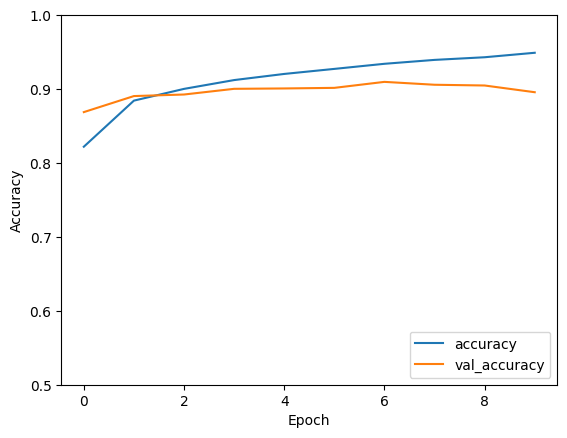

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [13]:
print(test_acc)

0.8956999778747559


In [14]:
### Точность модели выше, чем в предцдущем задании